## Plotly & Seaborn

![plotly](https://stevemaier.files.wordpress.com/2014/05/screen-shot-2014-05-17-at-4-46-09-pm.png)

The goal of this notebook is to compare seaborn and plotly and practice deeper visualization.

I am going to draw a graph that is used for statistical data.

I want to let everyone know that plotly(express) is not difficult.

---

### Table of Contents

- **Starter Code**
    - dataset description
    - before we start Plotly
    - Check Null Data (missingno)
- **Table View**
    - default notebook
    - plotly : `go.Table`
- **Countplot**
    - seaborn : `countplot`, `barplot` + `value_counts()`
    - plotly : `px.histogram`, `go.Histogram`
- **Distplot**
    - seaborn : `distplot`
    - plotly : `ff.creat_distplot`
- **Scatterplot**
    - seaborn : `scatterplot`
    - plotly : `px.scatter`, `go.Scatter`, `go.Scattergl`
- **Boxplot**
    - seaborn : `boxplot`, `stripplot`, `swarmplot`
    - plotly : `px.box`, `go.Box`
- **Violinplot**
    - seaborn : `violinplot`
    - plotly : `px.violin`, `go.Violin`
- **Jointplot**
    - seaborn : `jointplot`
    - plotly : `go.Histogram2dContour`, `go.Histogram`
    
- **ETC**
    - plotly : `px.treemap`, `px.sunburst`

## Starter Code


First, let's set up a basic library.

In [ ]:
# Data Processing
import numpy as np
import pandas as pd

# Basic Visualization tools
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 300

data = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [ ]:
!pip install seaborn==0.11.0
import seaborn as sns
sns.set_style("whitegrid")

     |████████████████████████████████| 283 kB 1.3 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


### Dataset description

|Feature|More Info|
|-|-|
| **gender** | [male, female] |
| **race/ethnicity** | [group A to E ] |
| **parental level of education** | categorical value|
| **lunch** |	|
| **test preparation course**	||
| **math score** | numeric score (int, not float) |
| **reading score** | numeric score (int, not float) |
| **writing score** | numeric score (int, not float) |



We can check the test score distribution by gender, group, parental education level, and the correlation between test scores.



### Before we start Plotly...

- Plotly's main object is `Figure()` object.
- `add_trace` can consider as *'stacking figures'*.
- I will use these libraries :
    - `import plotly.graph_objects as go`
    - `import plotly.express as px`
    - `import plotly.figure_factory as ff`


### Check Null Data

Check Nan/Null value first.

<AxesSubplot:>

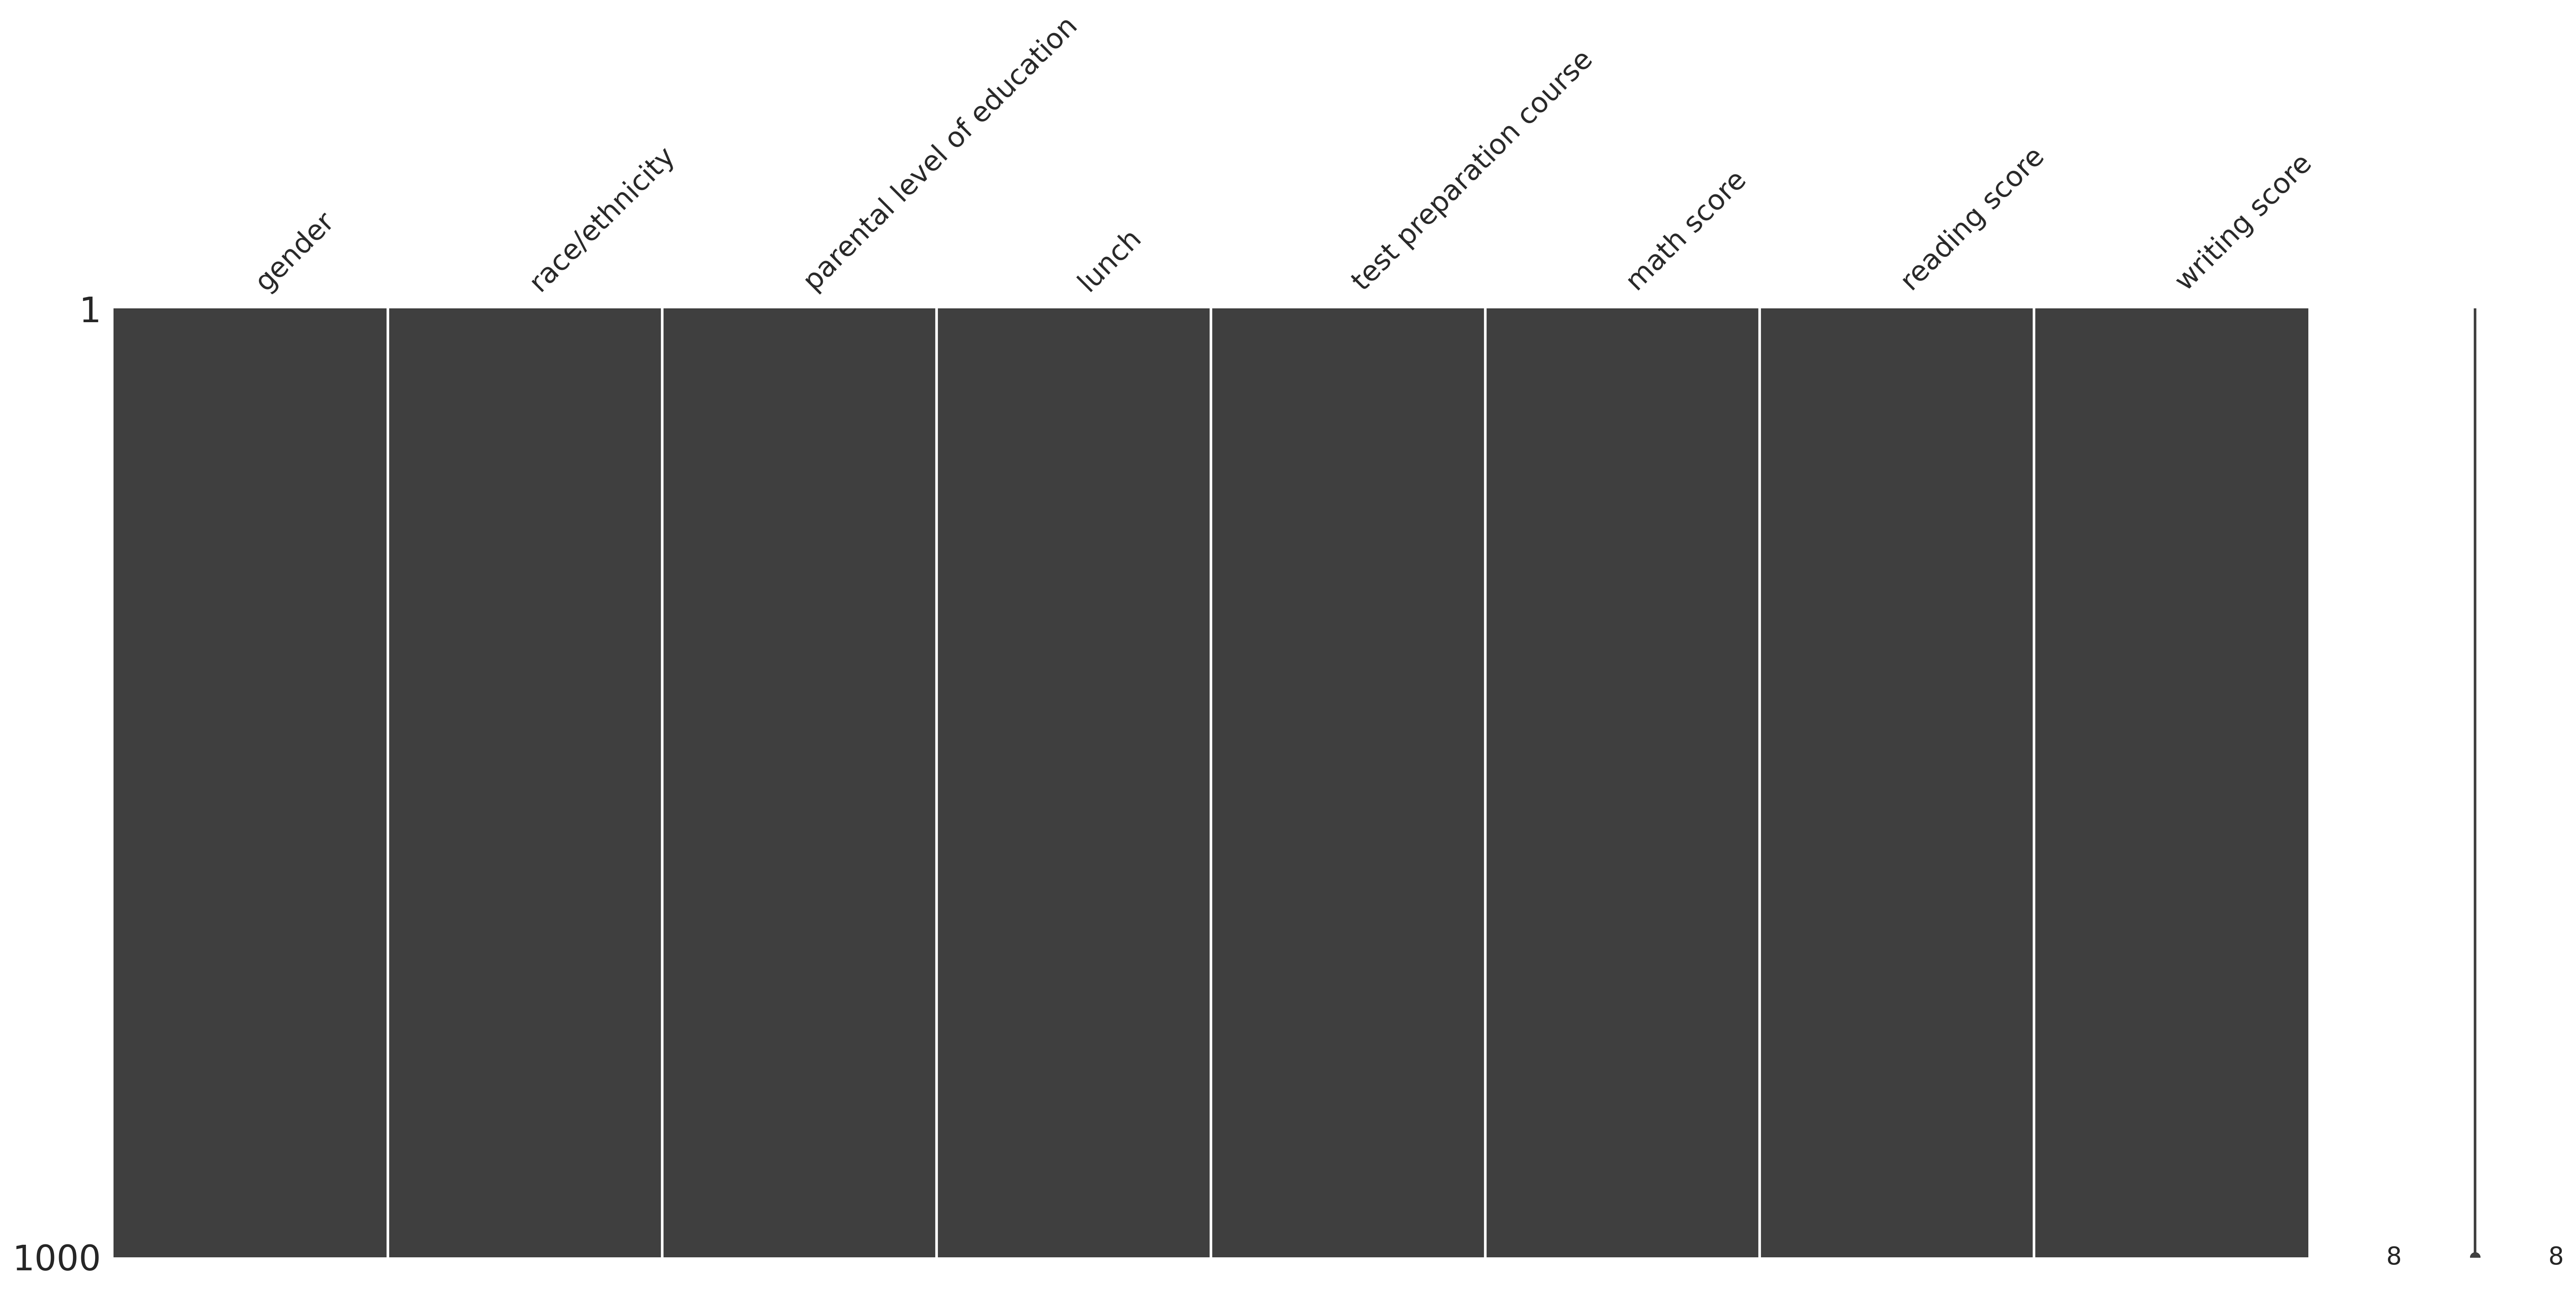

In [ ]:
import missingno as msno
msno.matrix(data)

But this dataset is fuuuuuuullllllll dataset. Great for Tutorial :)

## Table View

### default notebook

In [ ]:
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75



We can easily check a csv file as using `data.head()` or `data.tail()` or `data.sample()` or `display(data)`

> I prefer data.head() for no reason.

### Plotly : go.Table

- [Tables](https://plot.ly/python/table/)

You can see this table in plotly. (or you can custom every table what you want )

**`go.Table`** provides a Table object for detailed data viewing.

The data are arranged in a grid of rows and columns. Most styling can be specified for header, columns, rows or individual cells. Table is using a column-major order, ie. the grid is represented as a vector of column vectors.

you have to initialize headers & cells.

In [ ]:
# type 1 : default

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Table(header=dict(values=data.columns),
             cells=dict(values=data.head(3).T))
)

fig.show()

You can set `fill_color` parameter to change background color

In [ ]:
# type 2 : change color

fig = go.Figure()

fig.add_trace(
    go.Table(header=dict(values=data.columns, fill_color='paleturquoise'),
            cells=dict(values=data.head(3).T, fill_color='lavender'))
)

fig.show()

## Countplot

### Seaborn : countplot, barplot + value_counts()

In seaborn, we can easily draw these graph

- **[Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)** : Show the counts of observations in each categorical bin using bars.

Let's plot seaborn countplot.

**Little tips**
- If you want to make it vertical, replace x by y.
- Use `alpha` parameter to set opacity for more readable plot
- Use `hue` to find features' trend
- use `plt.xticks` or `plt.yticks` to rotation xaxis label.

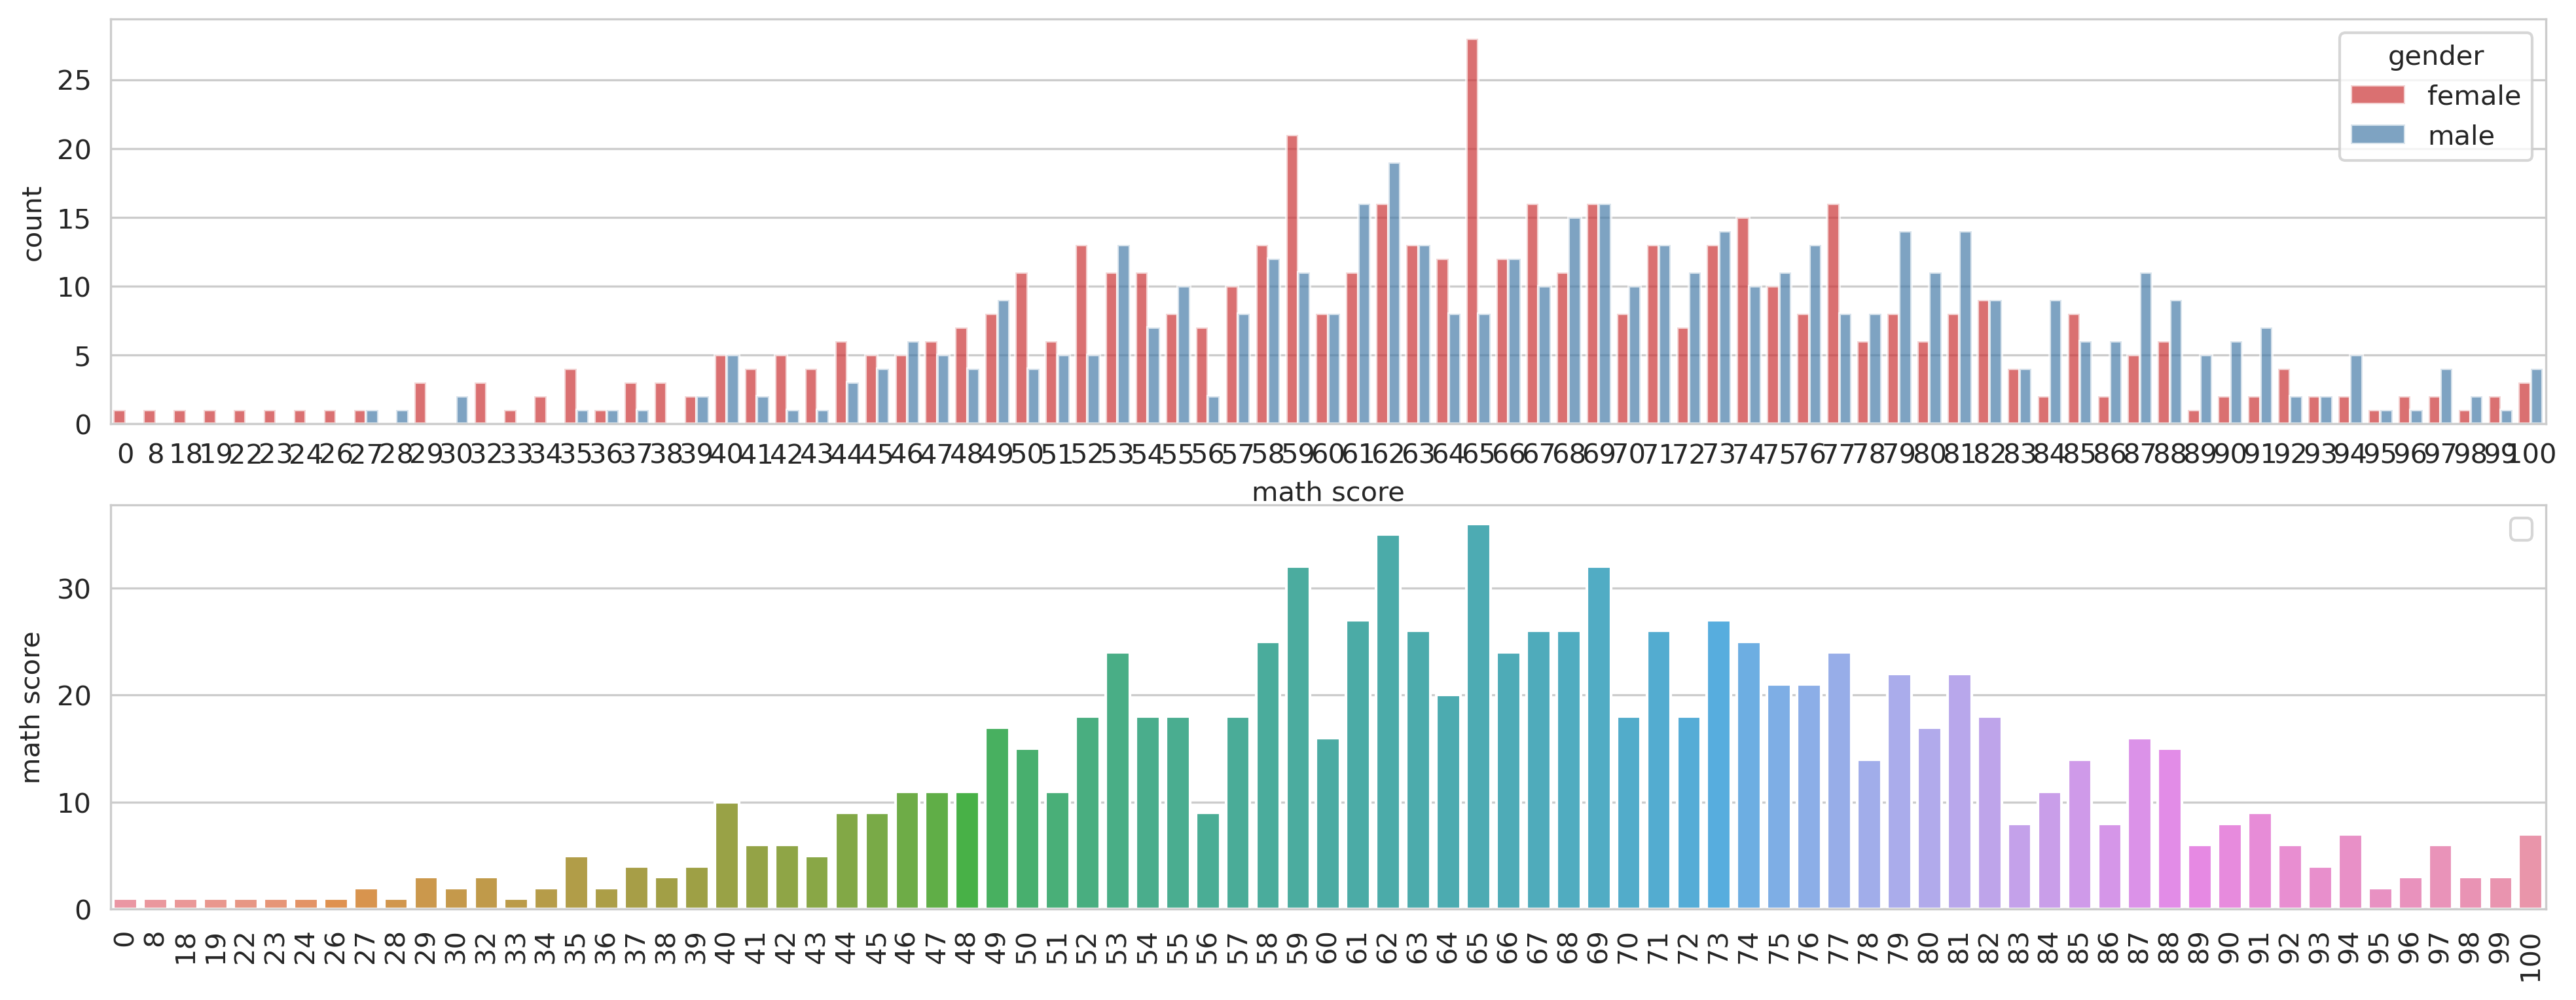

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(16, 6))
# type 1 : use hue parameter
sns.countplot(x='math score', data=data, hue='gender', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue
sns.barplot(x=data['math score'].value_counts().index, y=data['math score'].value_counts(), ax=ax[1])
plt.show()

### Plotly : px.histogram, go.Histogram

- [Histograms](https://plot.ly/python/histograms/)

Plotly doesn't have `countplot`. But with simple trick, we can make countplot. (or You can use `value_counts` + `bar` trick again)

`plotly.express` and `plotly.graph_objects` have `histogram` plot.

we can set x and y parameter same feature(it means y is number of x), and set color like hue.

you can change barmode as group

In [ ]:
import plotly.express as px

#type 1 : Stacked graph (default)

fig = px.histogram(data, x="math score", y="math score", color="gender")
fig.show()

#type 2 : group

fig = px.histogram(data, x="math score", y="math score", color="gender")
fig.update_layout(barmode='group')
fig.show()

You can add marginal parameter to show simple distribution.

As you will see below, the marginal part above is set to `boxplot`.

It is a graph that shows the quadrant, the median and the outlier.

In [ ]:
fig = px.histogram(data, x="math score", y="math score", color="gender",
                   marginal="box", # or violin, rug
                  )
fig.show()

## Distplot

### Seaborn : distplot

- [Distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot) : Flexibly plot a univariate distribution of observations.

`distplot` is similar to `countplot` because countplot is *a histogram according to frequency*.

Basically, you can look at it with histogram, so it's easier to see trends than countplot.

You cannot set the hue separately, so you need to draw the graphs individually. (you can add `label`)

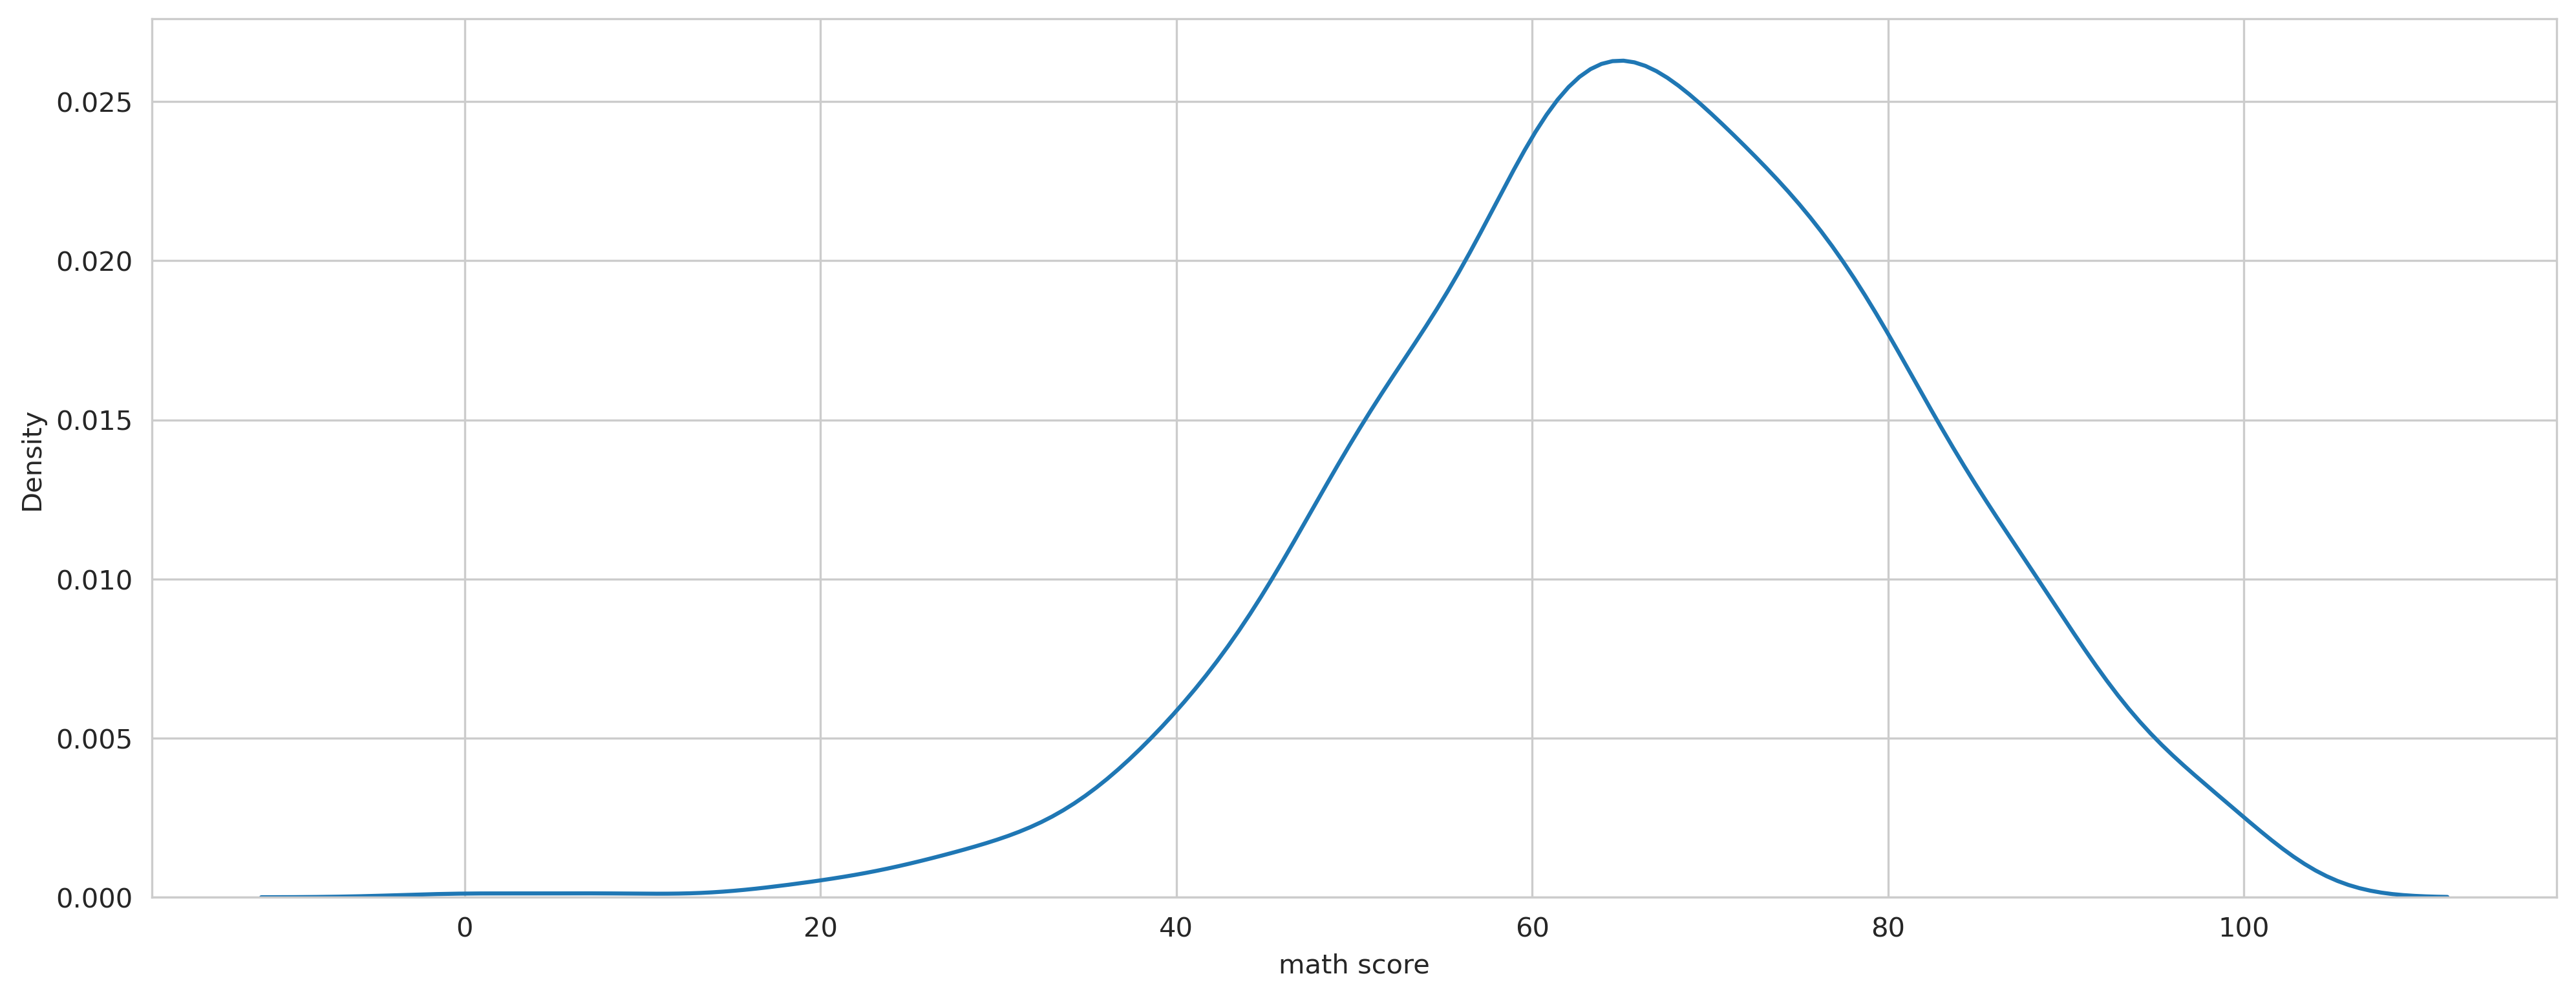

In [ ]:
# type 1 : default view
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(data['math score'])
plt.show()

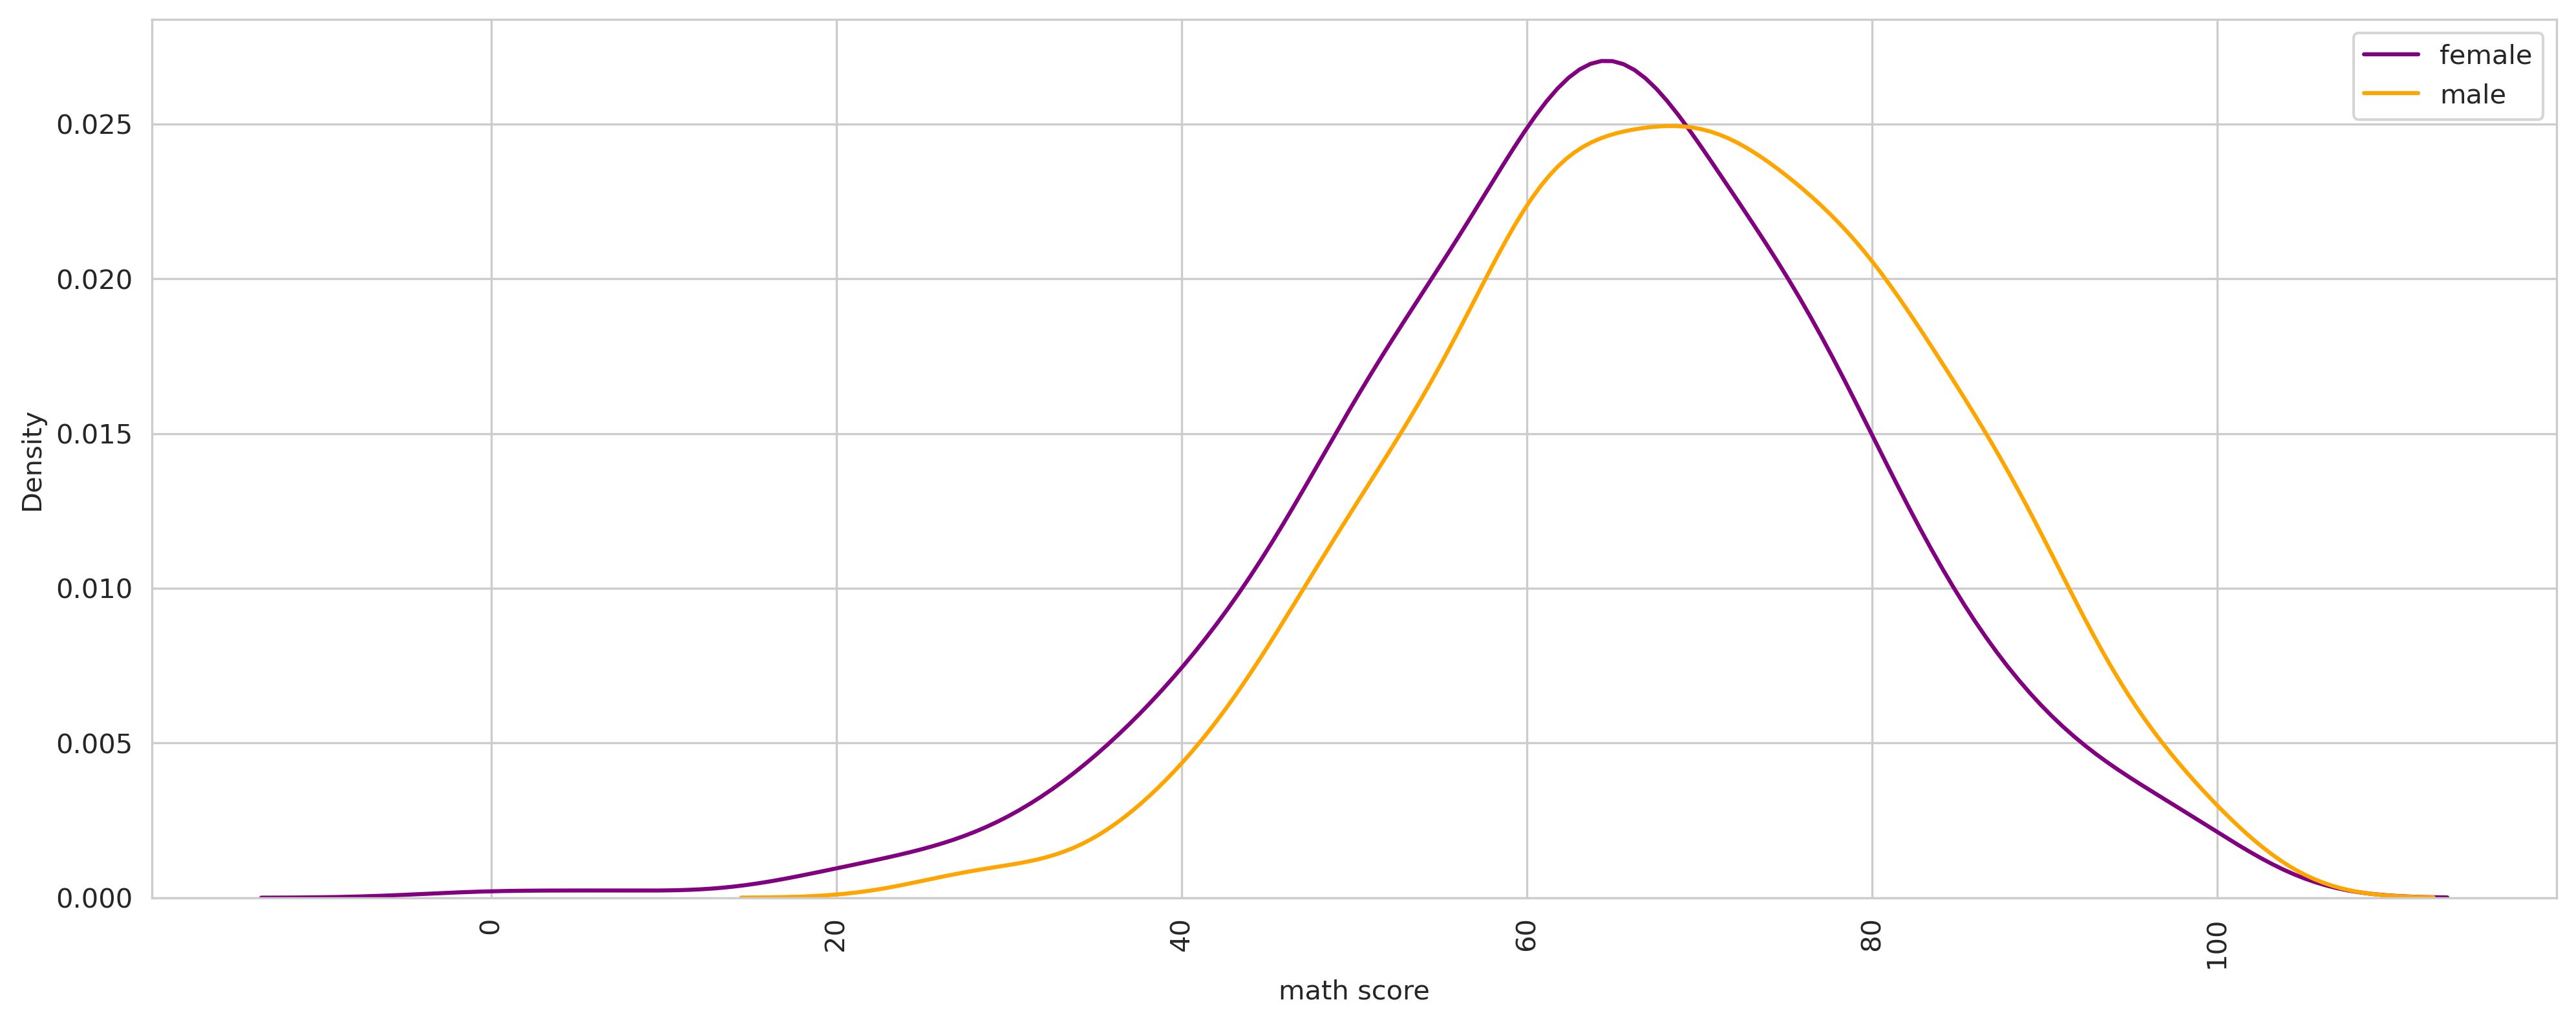

In [ ]:
# type 2 : draw 2 graph with label
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(data[data['gender']=='female']['math score'], color='purple', ax=ax, label='female')
sns.kdeplot(data[data['gender']=='male']['math score'], color='orange', ax=ax, label='male')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

Although extra, you can also add a mean line using matplotlib.

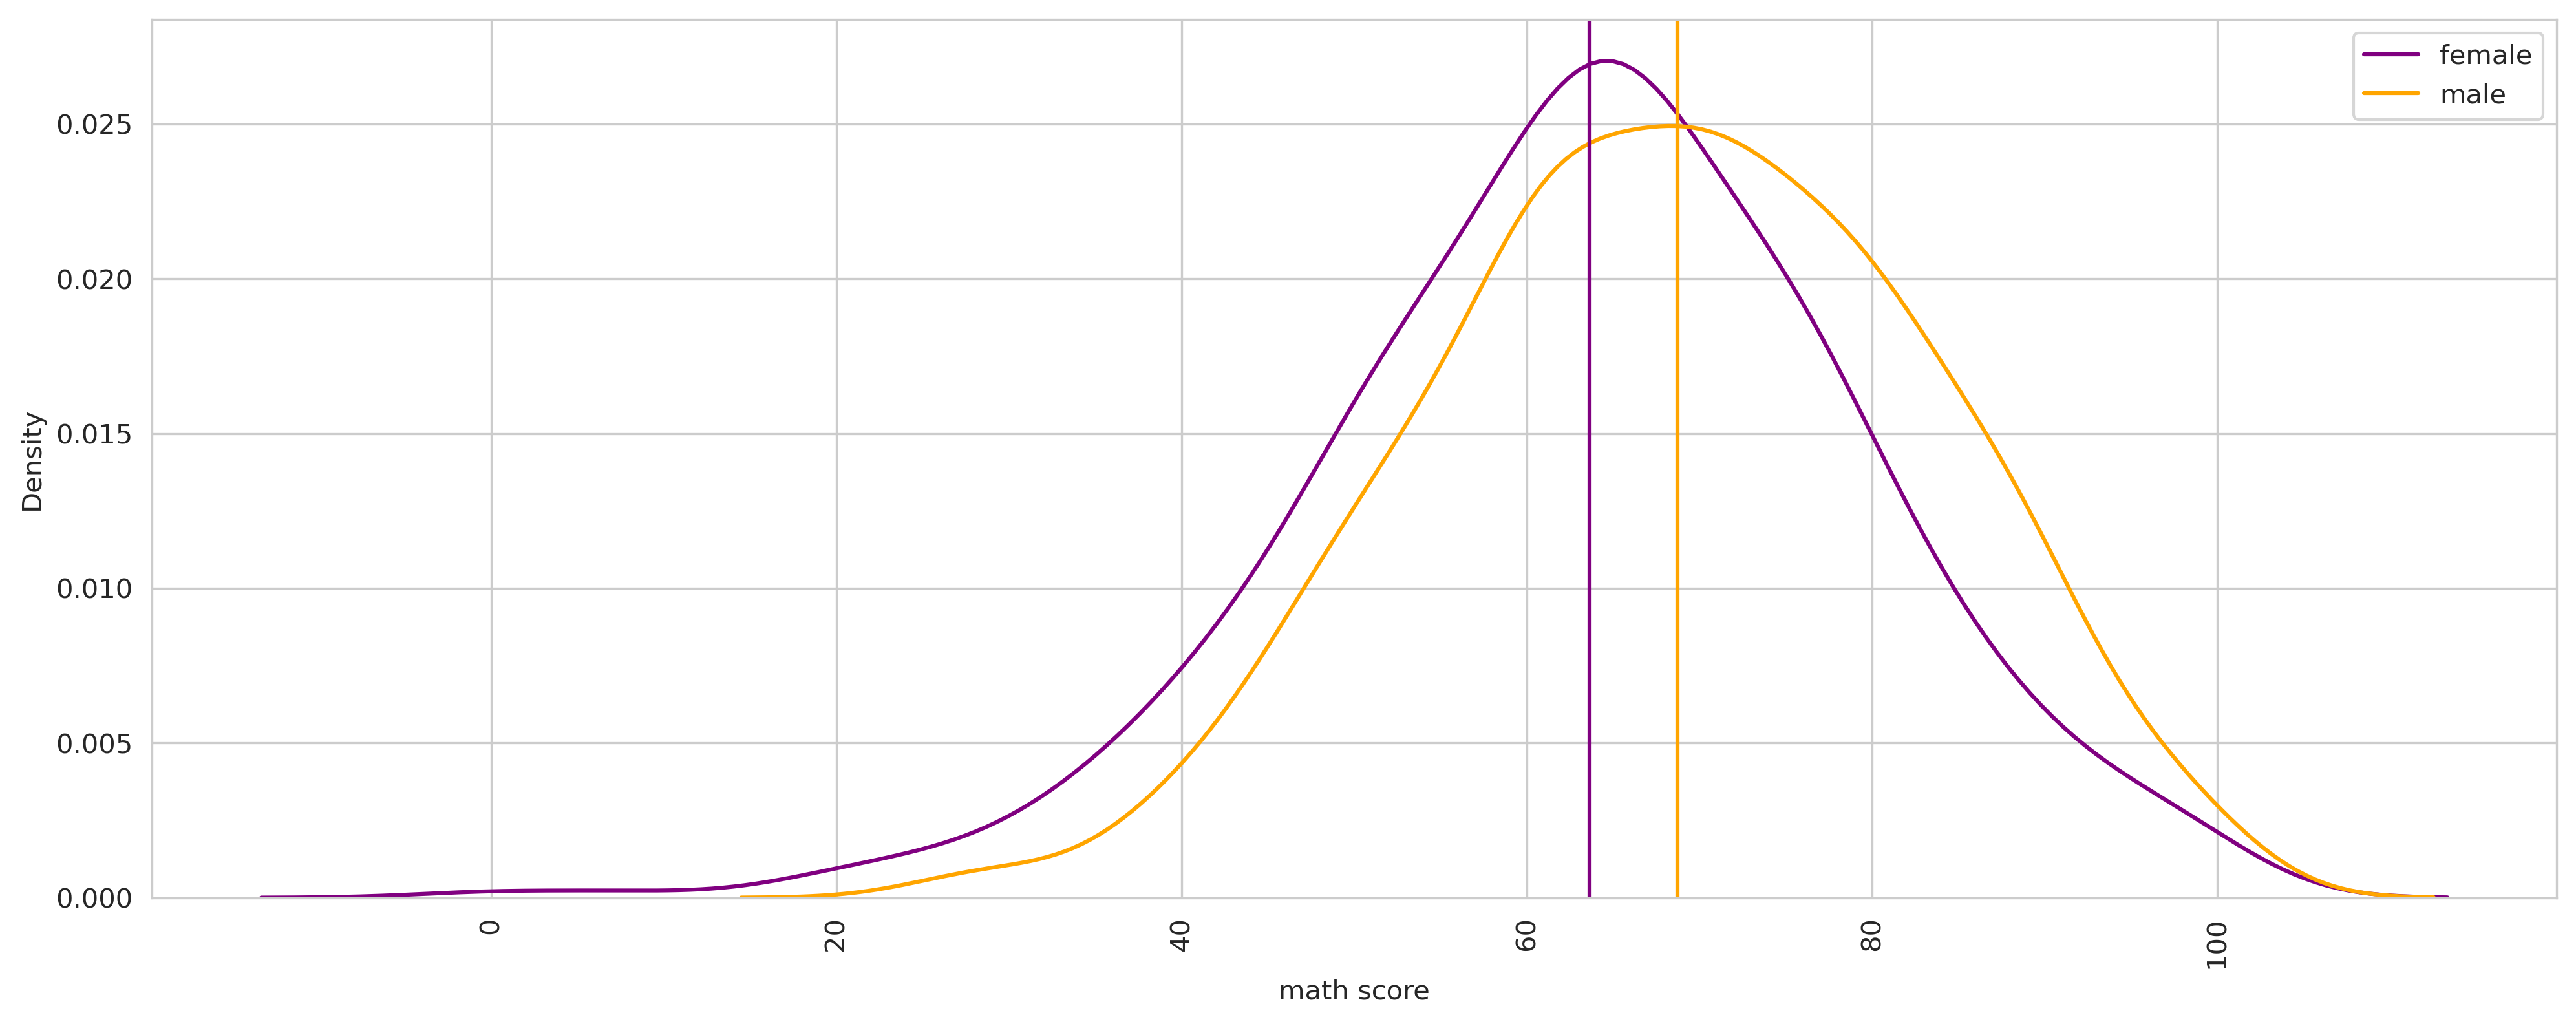

In [ ]:
# type 3 : add avg line
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(data[data['gender']=='female']['math score'], color='purple', ax=ax, label='female')
sns.kdeplot(data[data['gender']=='male']['math score'], color='orange', ax=ax, label='male')

# avg line
plt.axvline(data[data['gender']=='female']['math score'].mean(), color='purple')
plt.axvline(data[data['gender']=='male']['math score'].mean(), color='orange')

plt.legend()
plt.xticks(rotation='vertical')
plt.show()


### Plotly : ff.creat_distplot

- [Distplots](https://plot.ly/python/distplot/)

In Plotly, You can use `import plotly.figure_factory as ff`.

you have to separate data and label like below code :

In [ ]:
# type 1 : default
import plotly.figure_factory as ff

fig = ff.create_distplot([data[data['gender']=='male']['math score'], data[data['gender']=='female']['math score']], ['male', 'female'])
fig.show()

you can set bins width and color

In [ ]:
# type 2 : add color and change bin width

fig = ff.create_distplot([data[data['gender']=='male']['math score'], data[data['gender']=='female']['math score']],
                         ['male', 'female'],
                         colors = ['#2BCDC1', '#F66095'],
                         bin_size = [2, 2]
                        )
fig.show()

you can erase curve, histogram and rug

In [ ]:
# type 3 : change view (rug, hist, curve)

fig = ff.create_distplot([data[data['gender']=='male']['math score'], data[data['gender']=='female']['math score']],
                         ['male', 'female'],
                         colors = ['#2BCDC1', '#F66095'],
                         bin_size = [2, 2],
                         show_rug=False, #rug
                         show_hist=False, #hist
                         show_curve=True # curve
                        )
fig.show()

## Scatter Plot

### Seaborn : scatterplot

- [Scatter plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) : Draw a scatter plot with possibility of several semantic groupings.

Very simple point plotting. But depending on your custom abilities, you can create huge graphs that can handle high-dimensional data.

**Custom parameter**

1. `hue` : Color change by category
2. `style` : marker (+, o, -, etc)
3. `size` : point size

The example will make it easier to understand.

The size is small, but if you look closely, you will be able to feel different parts. Compare with the `legend` section.

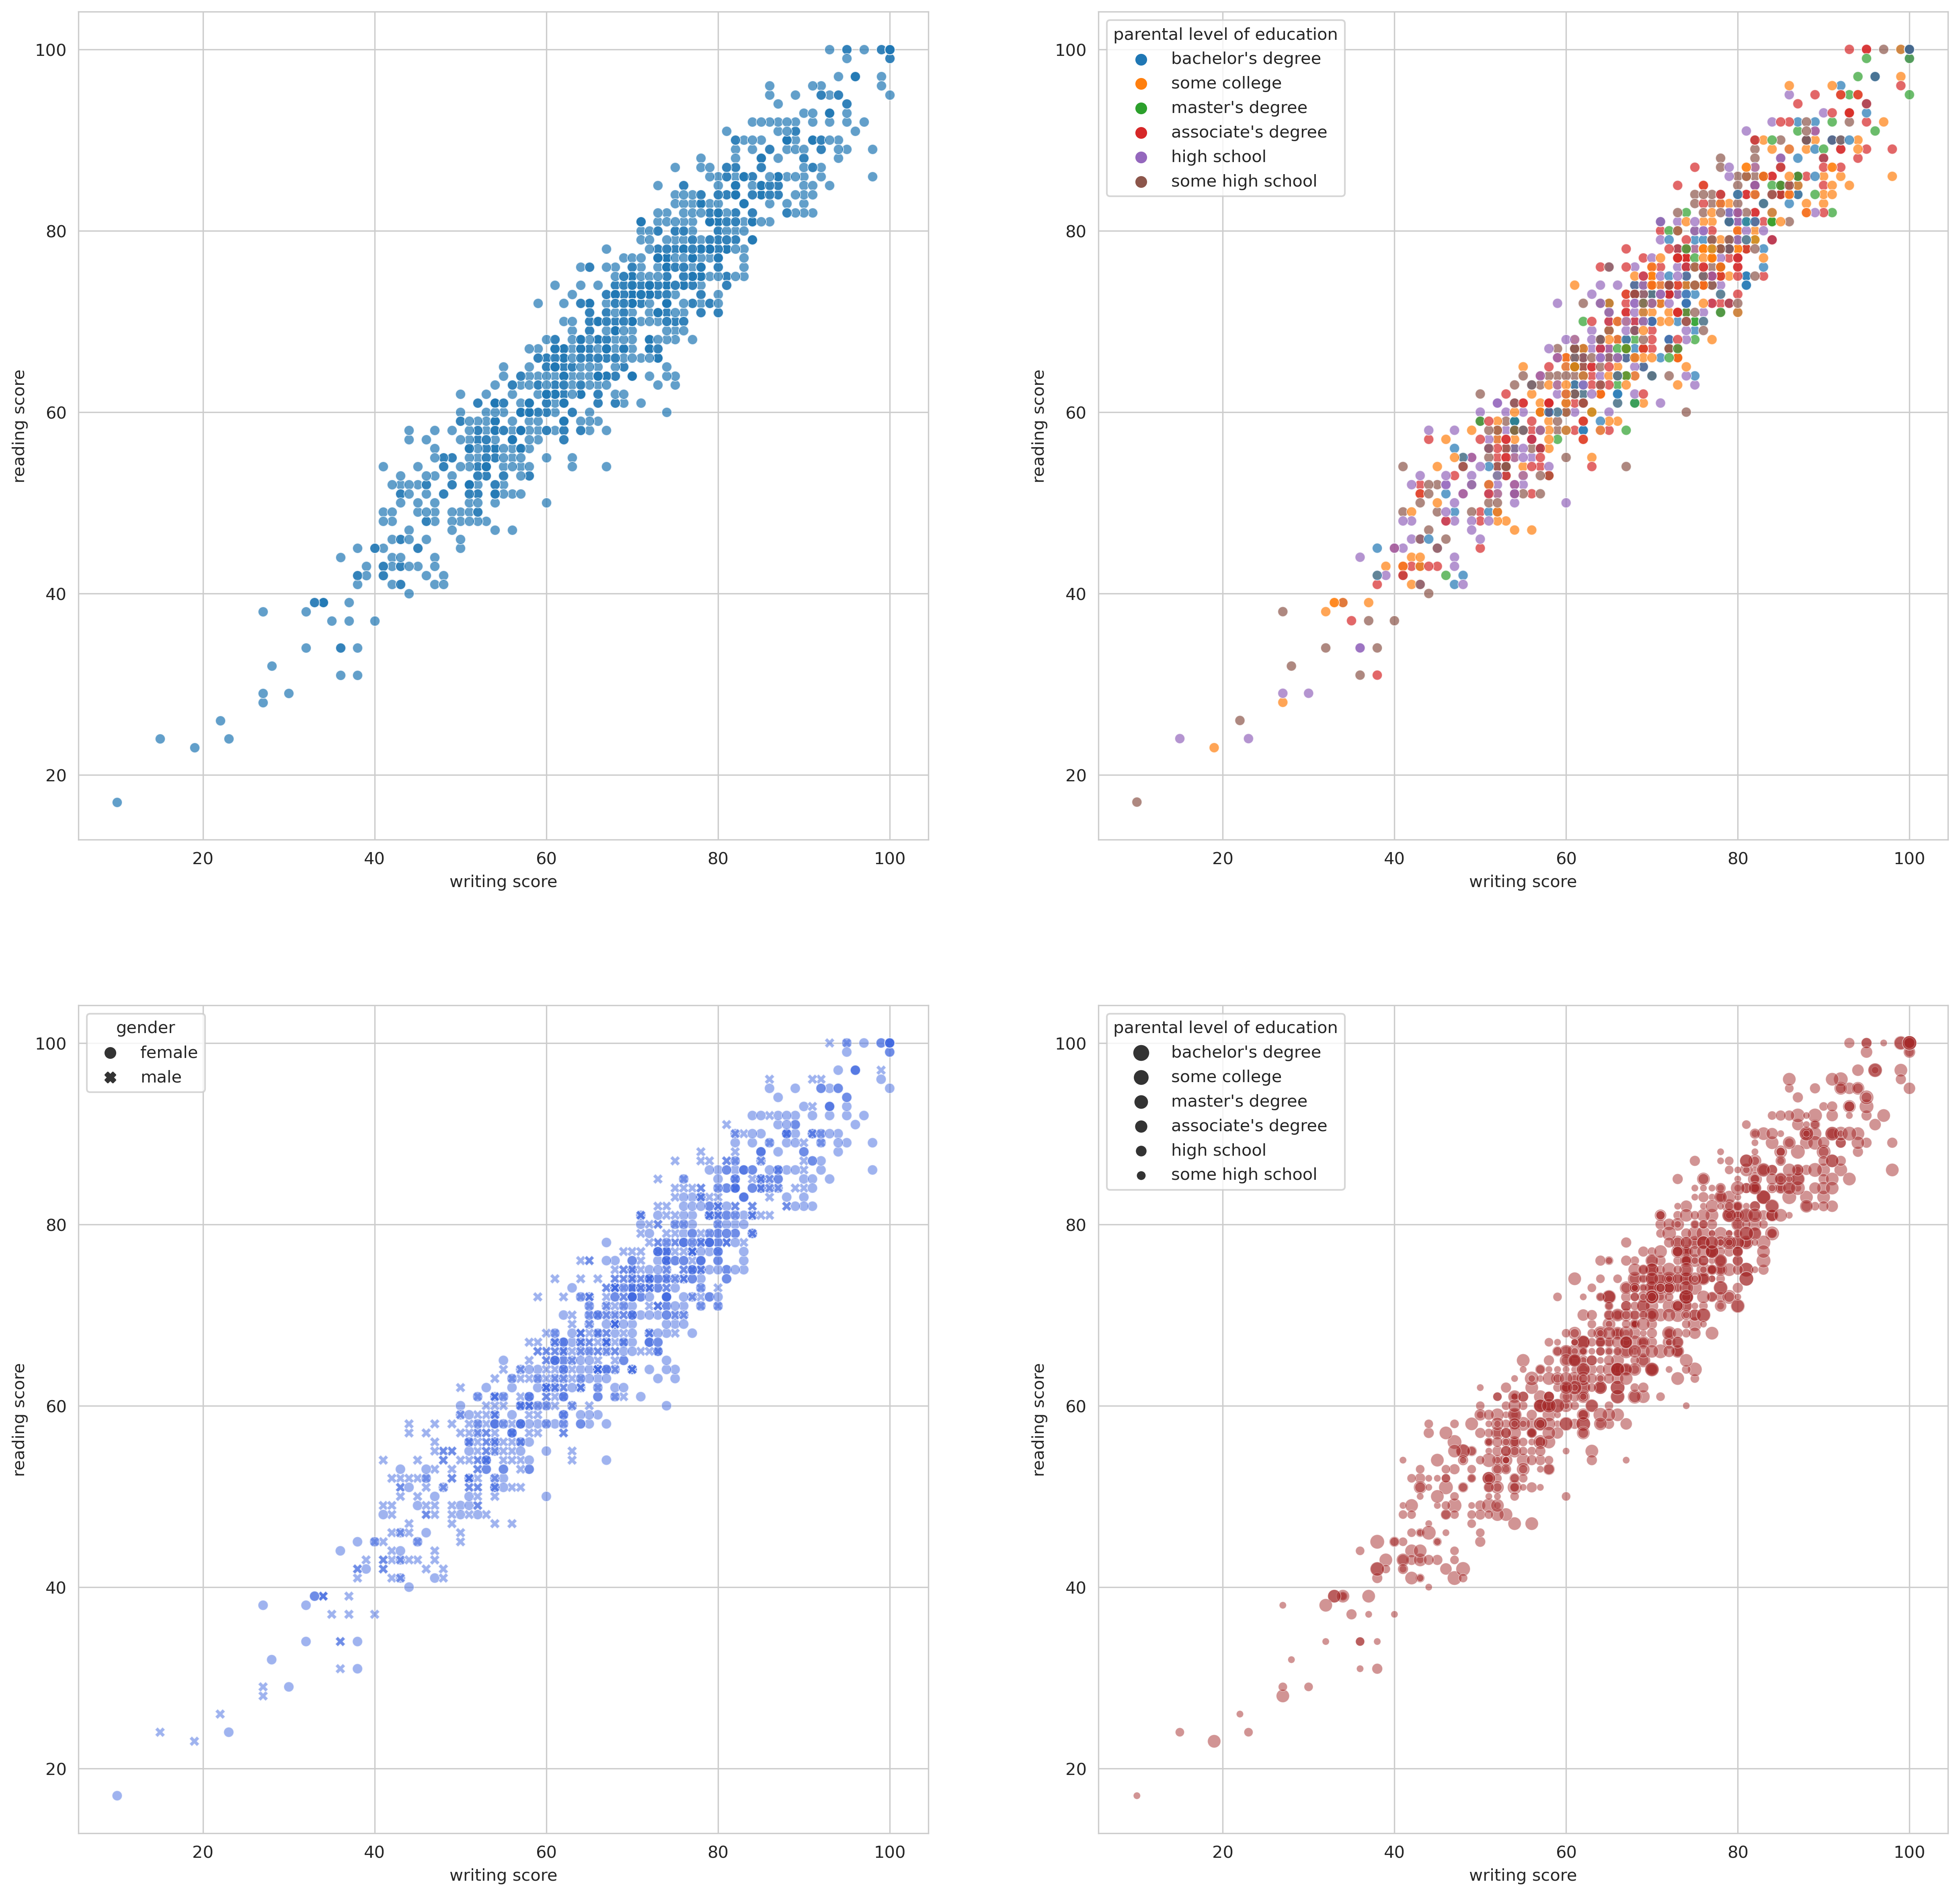

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# type 1 : default scatter plot
sns.scatterplot(data=data, x='writing score', y='reading score', alpha=0.7, ax=ax[0][0])

# type 2 : with hue
sns.scatterplot(data=data, x='writing score', y='reading score', hue='parental level of education', alpha=0.7, ax=ax[0][1])

# type 3 : with style & color
sns.scatterplot(data=data, x='writing score', y='reading score',style='gender', color='royalblue', alpha=0.5, ax=ax[1][0])

# type 4 : with size & color
sns.scatterplot(data=data, x='writing score', y='reading score',size='parental level of education', color='brown', alpha=0.5, ax=ax[1][1])

plt.show()

If you use them all together, you can plot high-dimensional data on a two-dimensional plane.

However, this data is not very efficient, so I recommend using it occasionally.

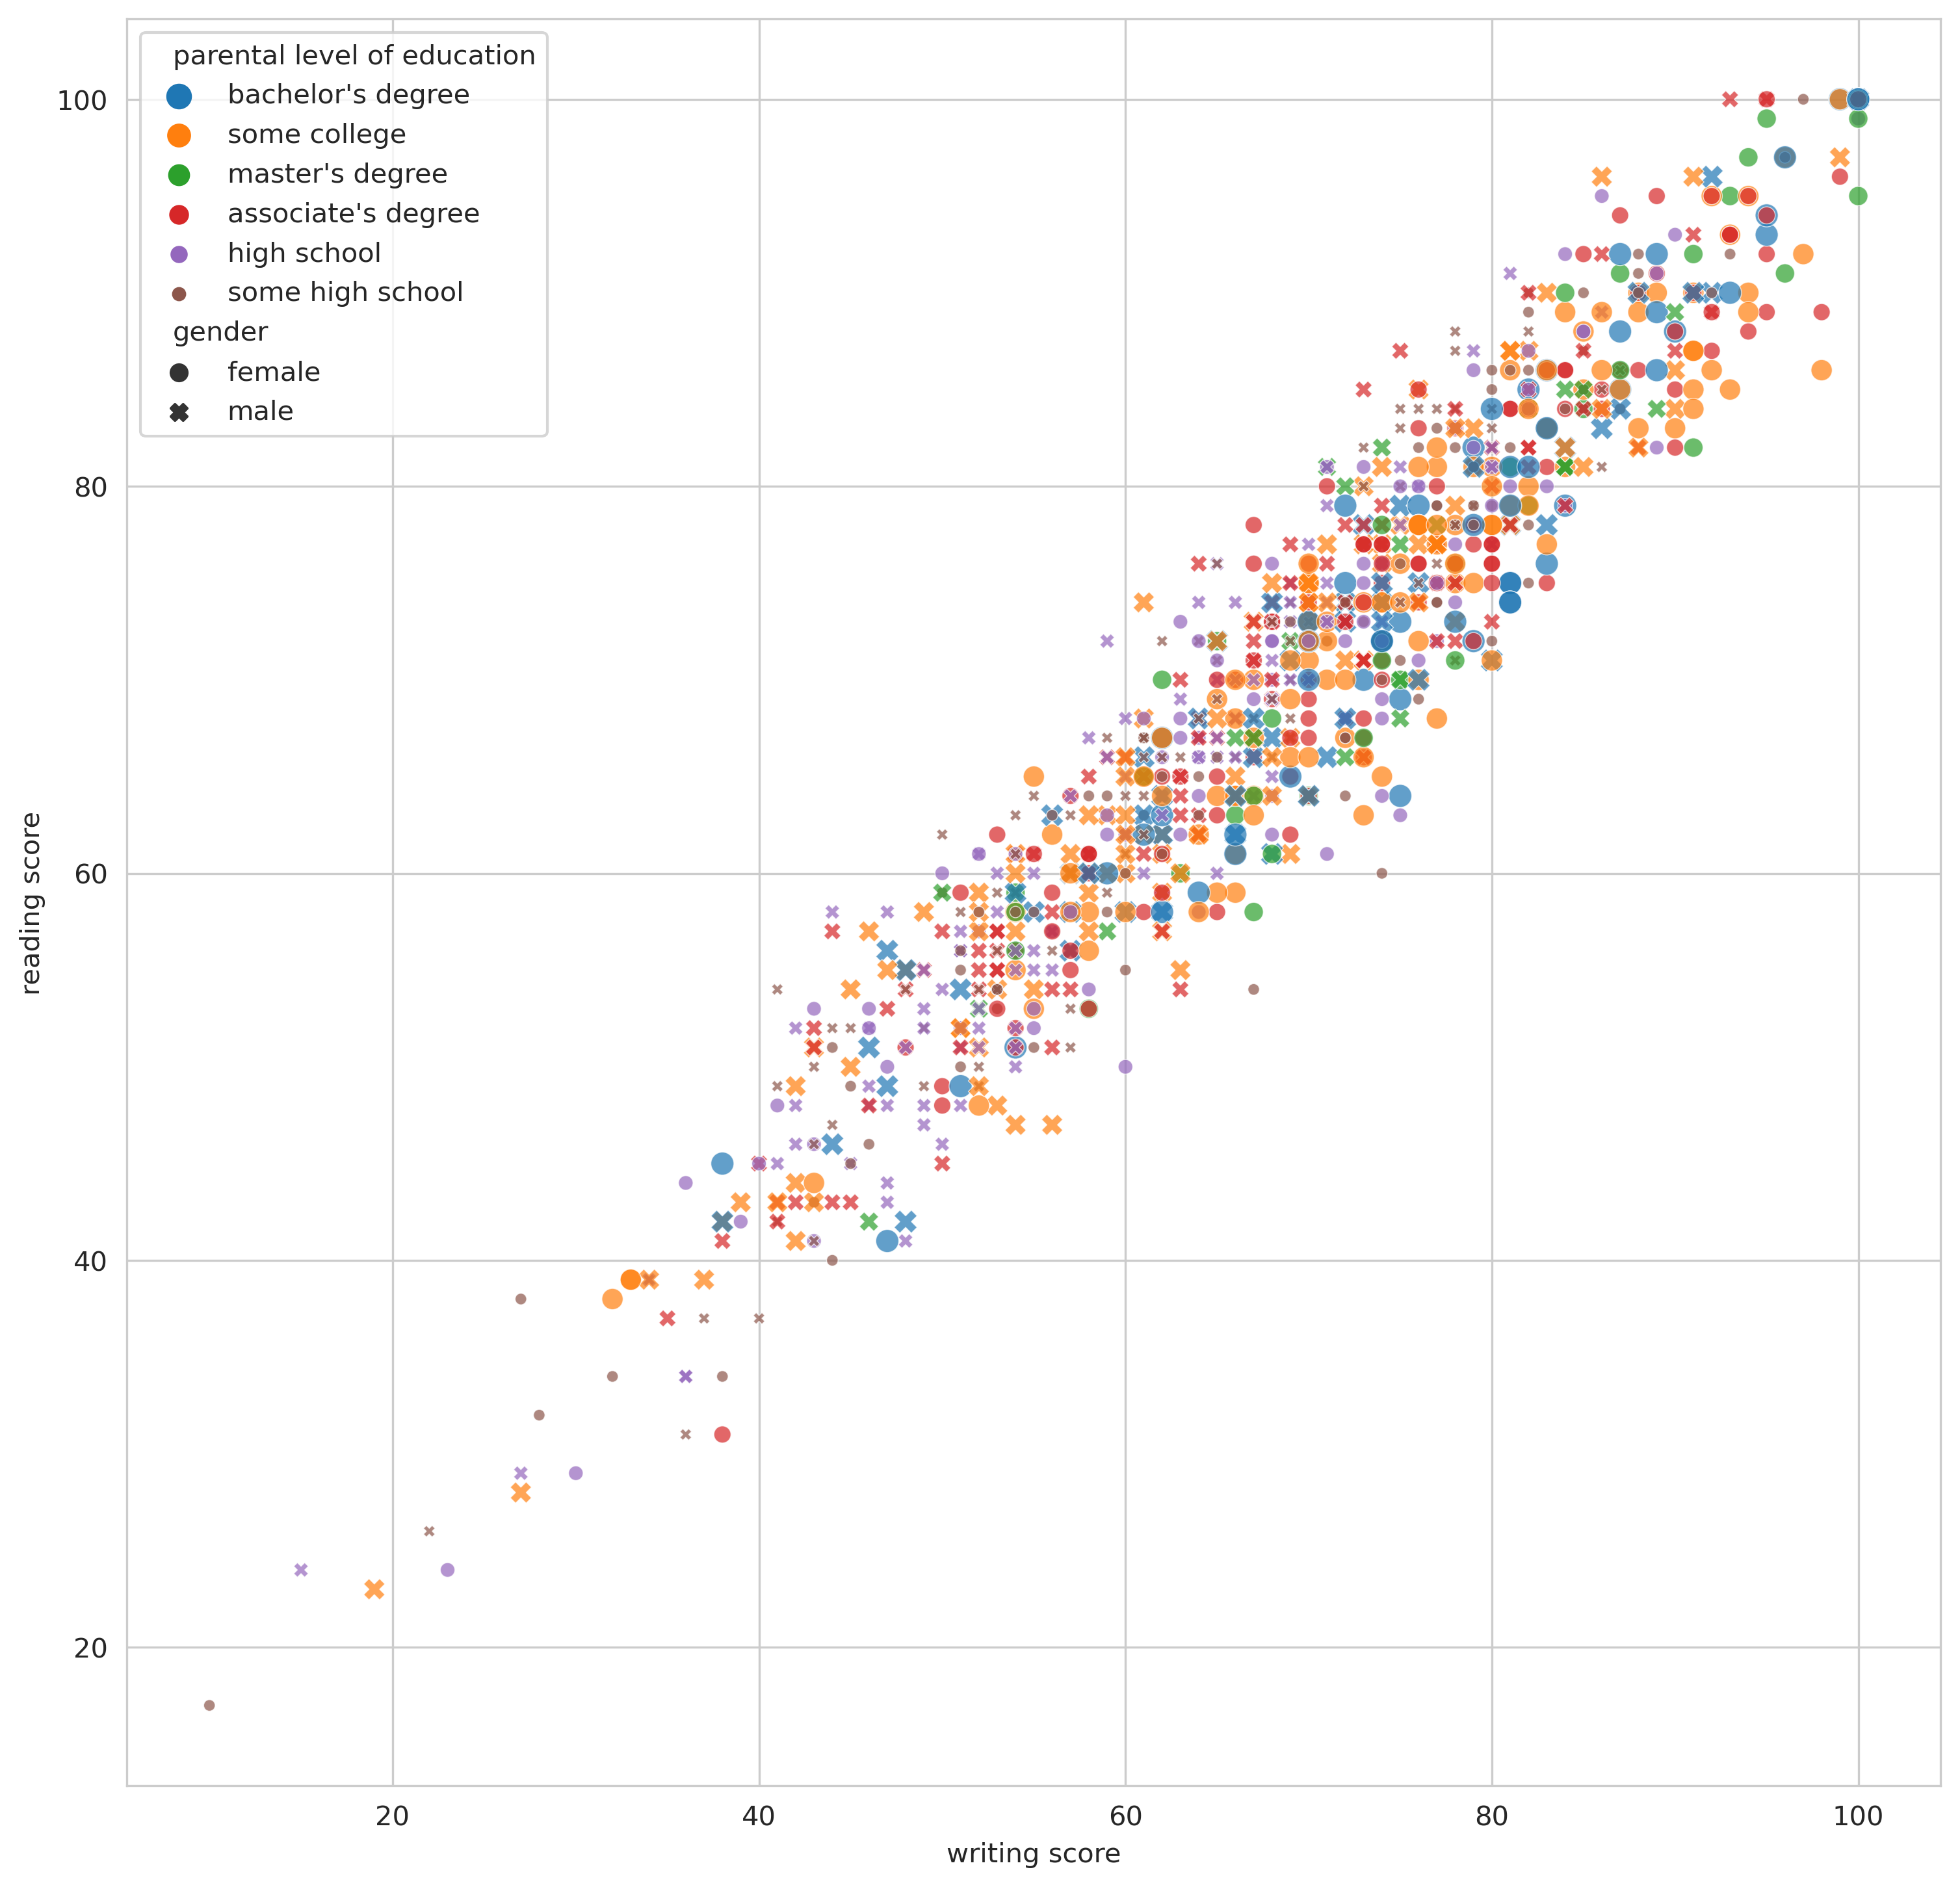

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.scatterplot(data=data, x='writing score', y='reading score', style='gender',hue='parental level of education',size='parental level of education', alpha=0.7)
plt.show()

### Plotly : px.scatter, go.Scatter, go.Scattergl

- [Scatter](https://plot.ly/python/line-and-scatter/)

First, we can use `px.scatter`.

In [ ]:
# type 1 : default
fig = px.scatter(data, x='writing score', y='reading score')
fig.show()

we can use color parameter as seaborn's `hue`

In [ ]:
# type 2 : use color as seaborn hue
fig = px.scatter(data, x='writing score', y='reading score', color='parental level of education', opacity=0.5)
fig.show()

To use size, the feature must be numeric. so Let's encode `parental level of education`.

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['parental level of education'] = LE.fit_transform(data['parental level of education'])

In [ ]:
# type 3 : with size & color
fig = px.scatter(data, x='writing score', y='reading score',
                 color='parental level of education',
                 size='parental level of education',
                )
fig.show()

## Box Plot

### Seaborn : boxplot, stripplot, swarmplot

- [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) : Draw a box plot to show distributions with respect to categories.
- [stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html) : Draw a scatterplot where one variable is categorical.
- [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) : Draw a categorical scatterplot with non-overlapping points.


It consists of the minimum value (min), the maximum value (max), the median value (median or second quartile), and 1Q and 3Q (first quartile and third quartile, respectively), and are typically 1.5 times IQR (values ​​of 3Q-1Q) from 1Q. Data points less than or greater than 1.5 IQR from 3Q will be represented as outliers.

Usually I use stripplot(swarmplot) with boxplot to look at distribution and information.

We can look at a single variable or two variables.

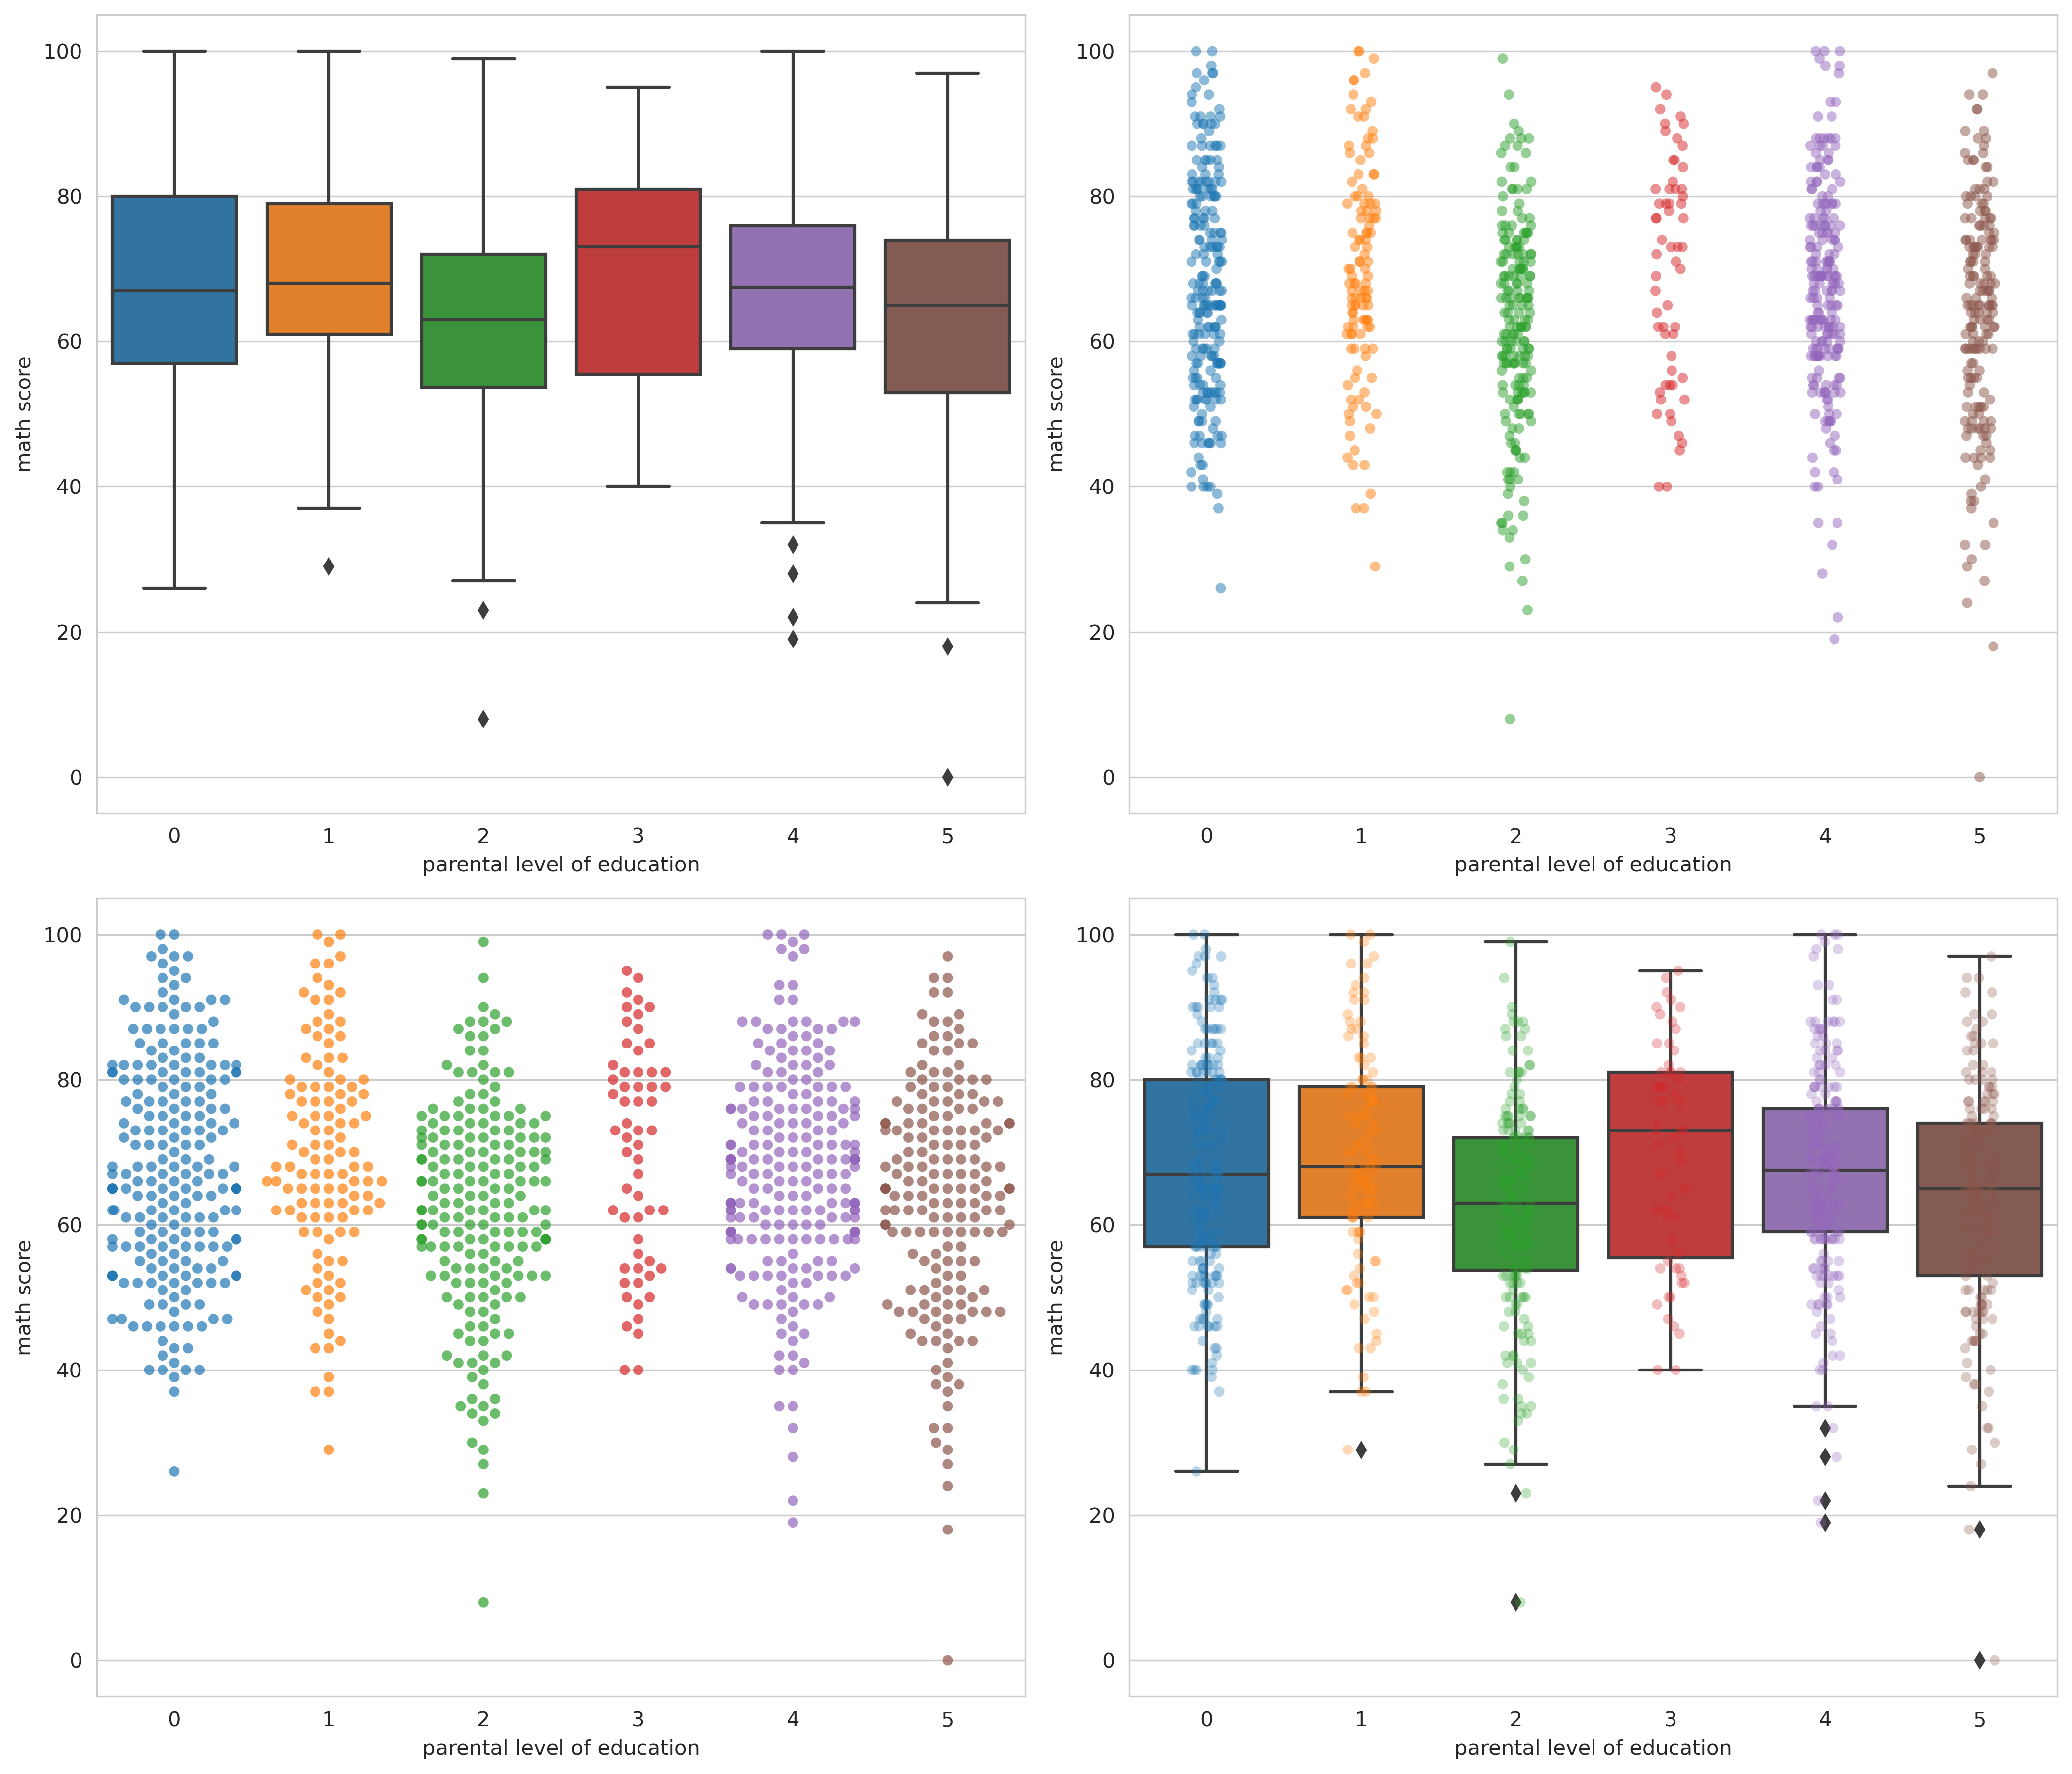

In [ ]:
# type 1 : default boxplot & stripplot

fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# boxplot
sns.boxplot(x='parental level of education', y='math score', data=data, ax=ax[0][0])

# stripplot
sns.stripplot(x='parental level of education', y='math score', data=data, ax=ax[0][1], alpha=0.5)

# swarmplot
sns.swarmplot(x='parental level of education', y='math score', data=data, ax=ax[1][0], alpha=0.7)

# both
sns.boxplot(x='parental level of education', y='math score', data=data, ax=ax[1][1])
sns.stripplot(x='parental level of education', y='math score', data=data, ax=ax[1][1], alpha=0.3)

plt.tight_layout()
plt.show()

As with many other seaborn functions, you can add `hue` parameters.

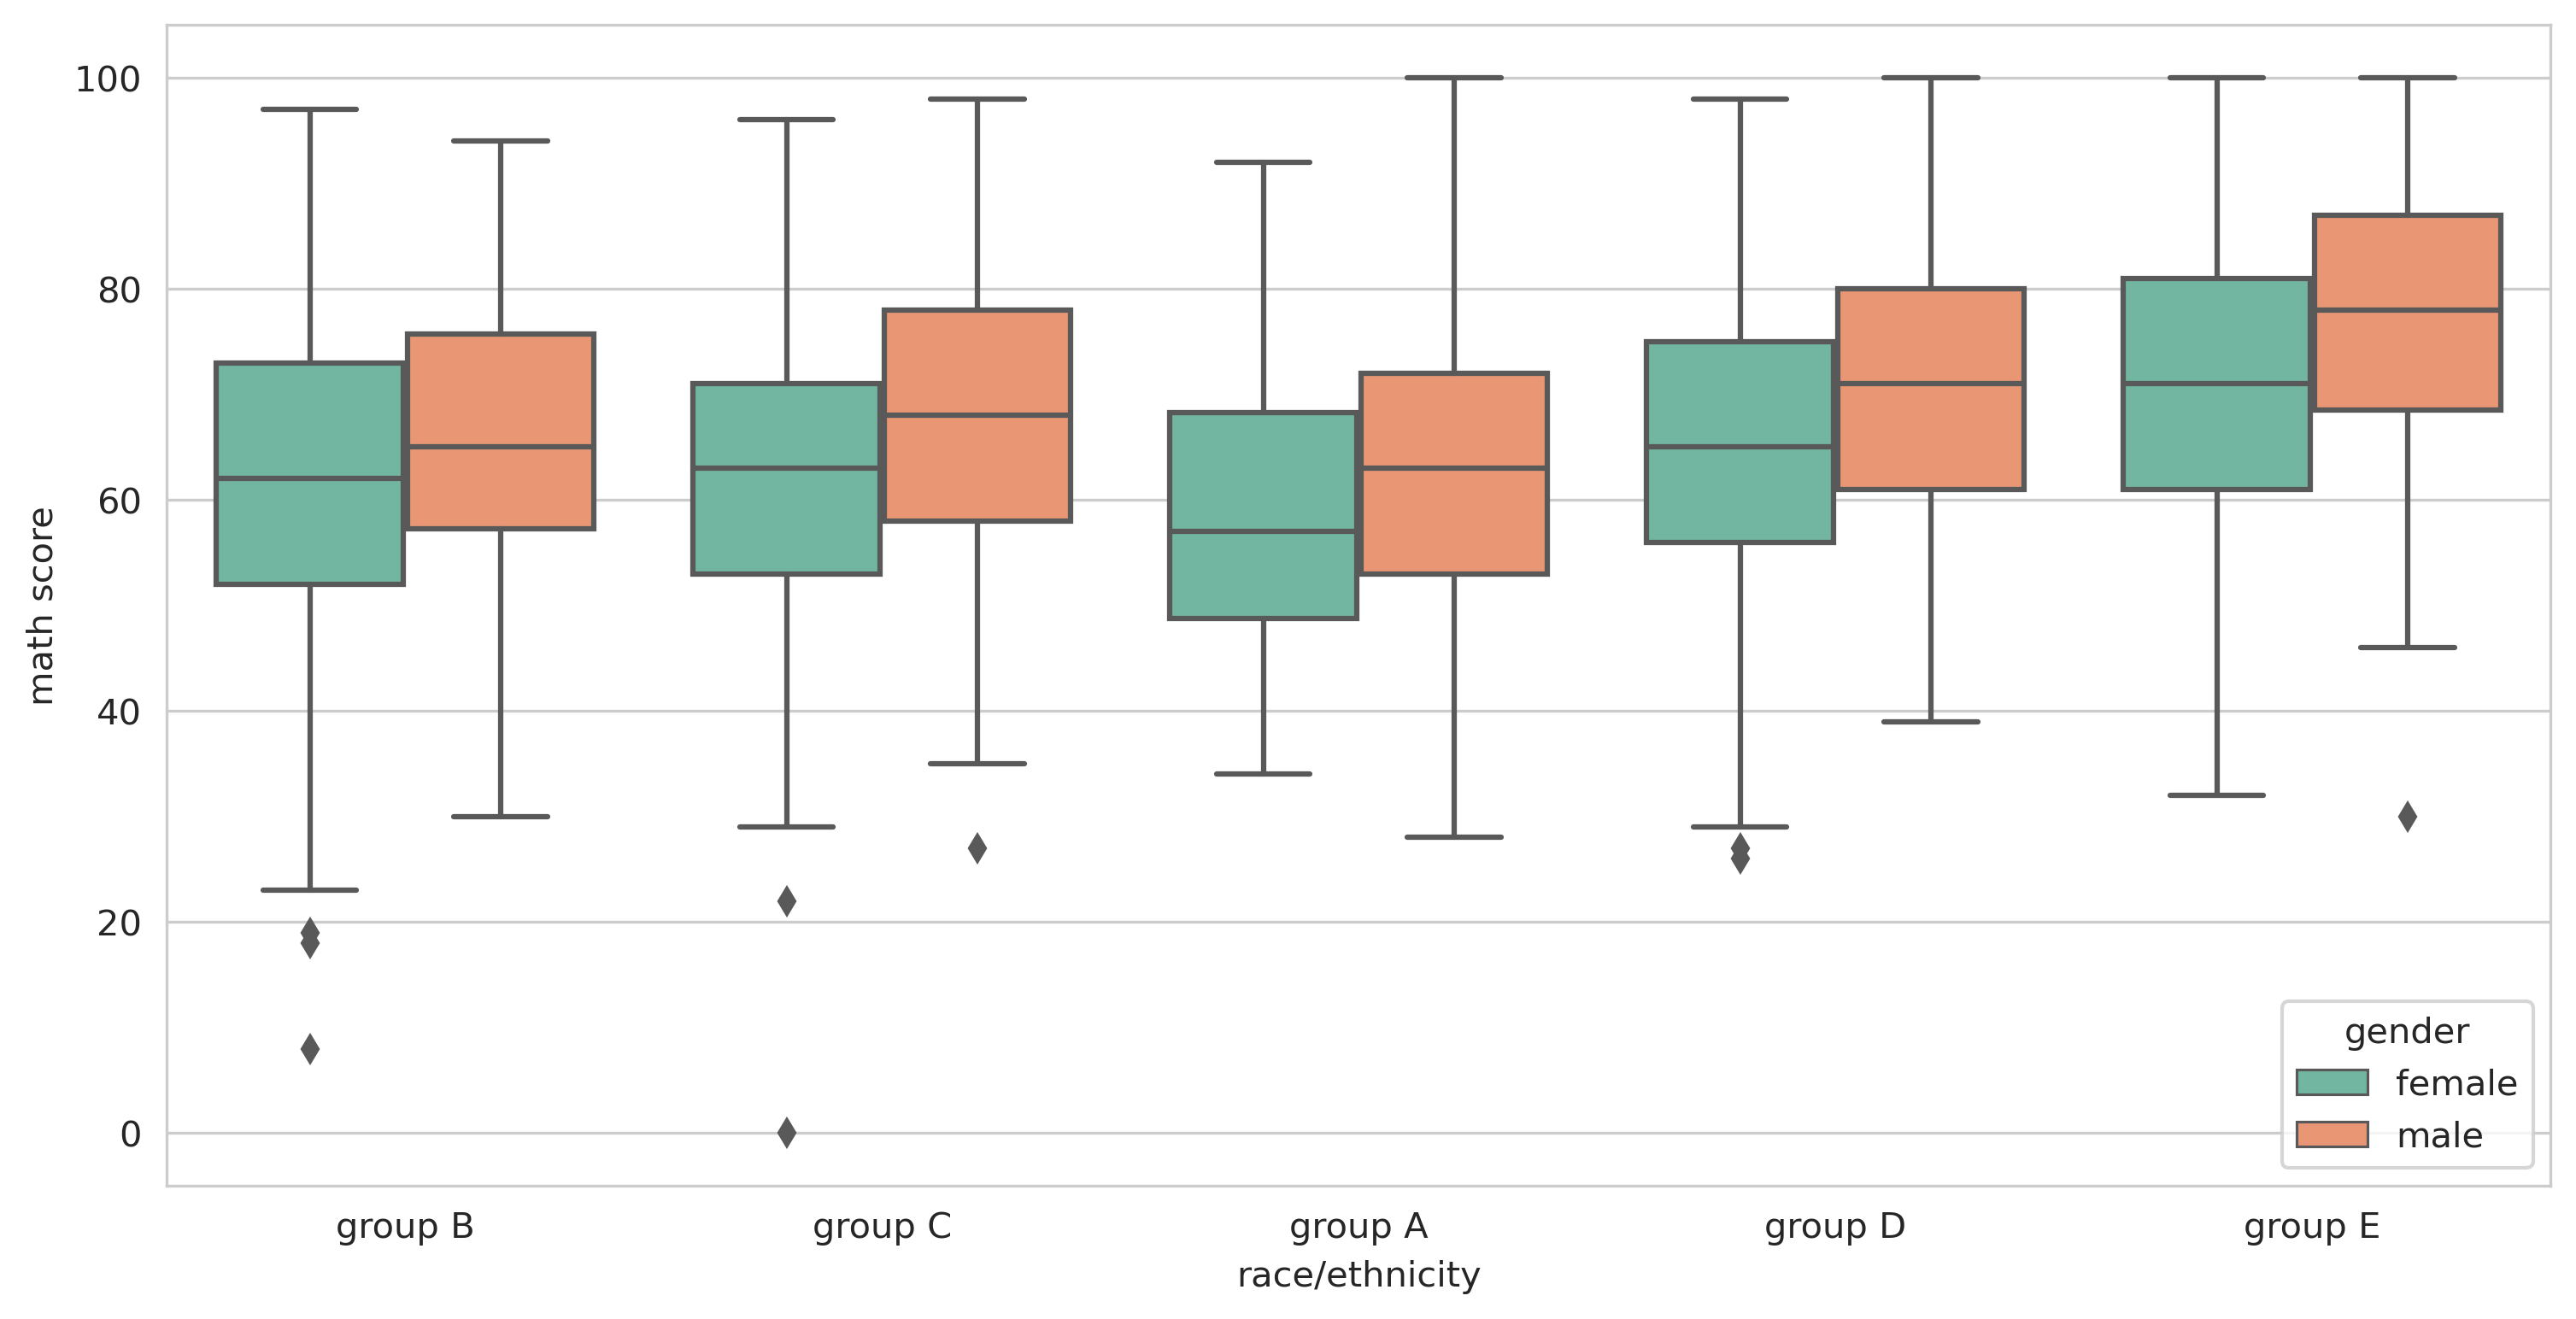

In [ ]:
# type 2 : we can add hue parameter
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='race/ethnicity', y='math score', hue='gender', palette='Set2', data=data, ax=ax)
plt.show()

### Plotly : px.box, go.Box

- [Box Plots](https://plot.ly/python/box-plots/)

you can use `px.box` or `go.Box` and `px.box` is more easier.

In [ ]:
# type 1 : default boxplot
fig = px.box(data, x='parental level of education', y='math score')
fig.show()

you can draw seaborn's `stripplot` by using `points` parameter.

In [ ]:
# type 2 : boxplot with stripplot
fig = px.box(data, x='parental level of education', y='math score', points="all")
fig.show()

`color` is same as `hue`

In [ ]:
# type 3 : boxplot with stripplot + color
fig = px.box(data, x='parental level of education', y='math score', color='gender', points="all")
fig.show()

## Violin Plot

### Seaborn : violinplot

- [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) : Draw a combination of boxplot and kernel density estimate.

Almost the same function as box plot, with the difference that it draws kde.

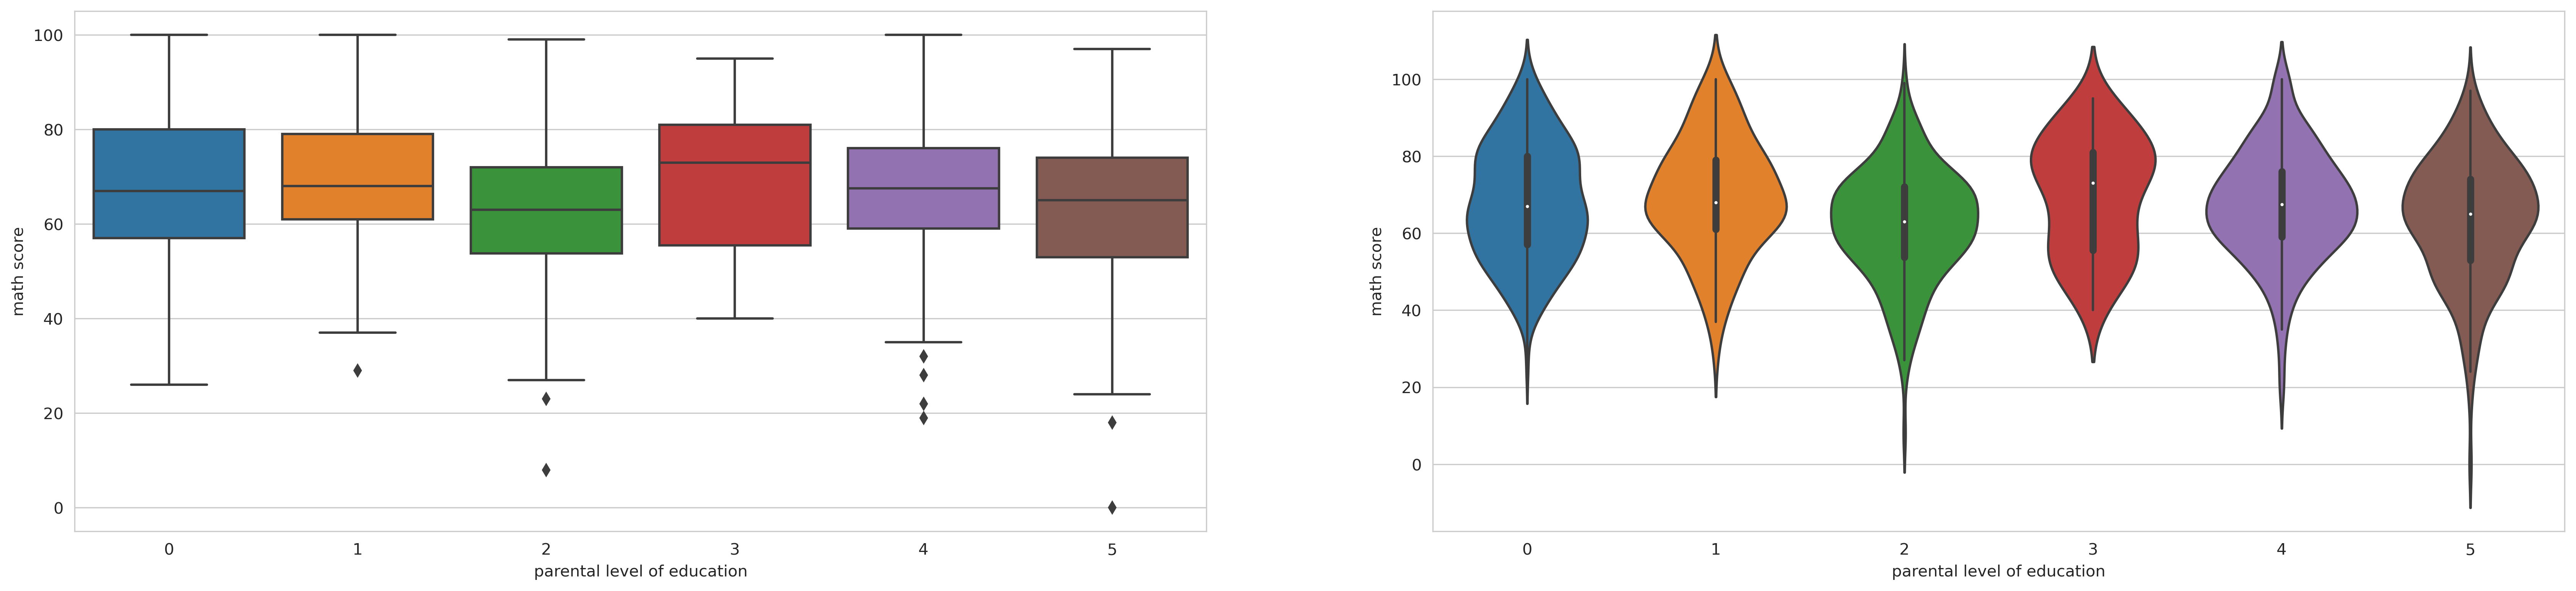

In [ ]:
# type 1 : compare with boxplot

fig, ax = plt.subplots(1, 2, figsize=(28, 6))

# boxplot
sns.boxplot(x='parental level of education', y='math score', data=data, ax=ax[0])

# violinplot
sns.violinplot(x='parental level of education', y='math score', data=data, ax=ax[1])

plt.show()

you can use `hue` parameter

and there are two views.

- split : True
- split : False(default)

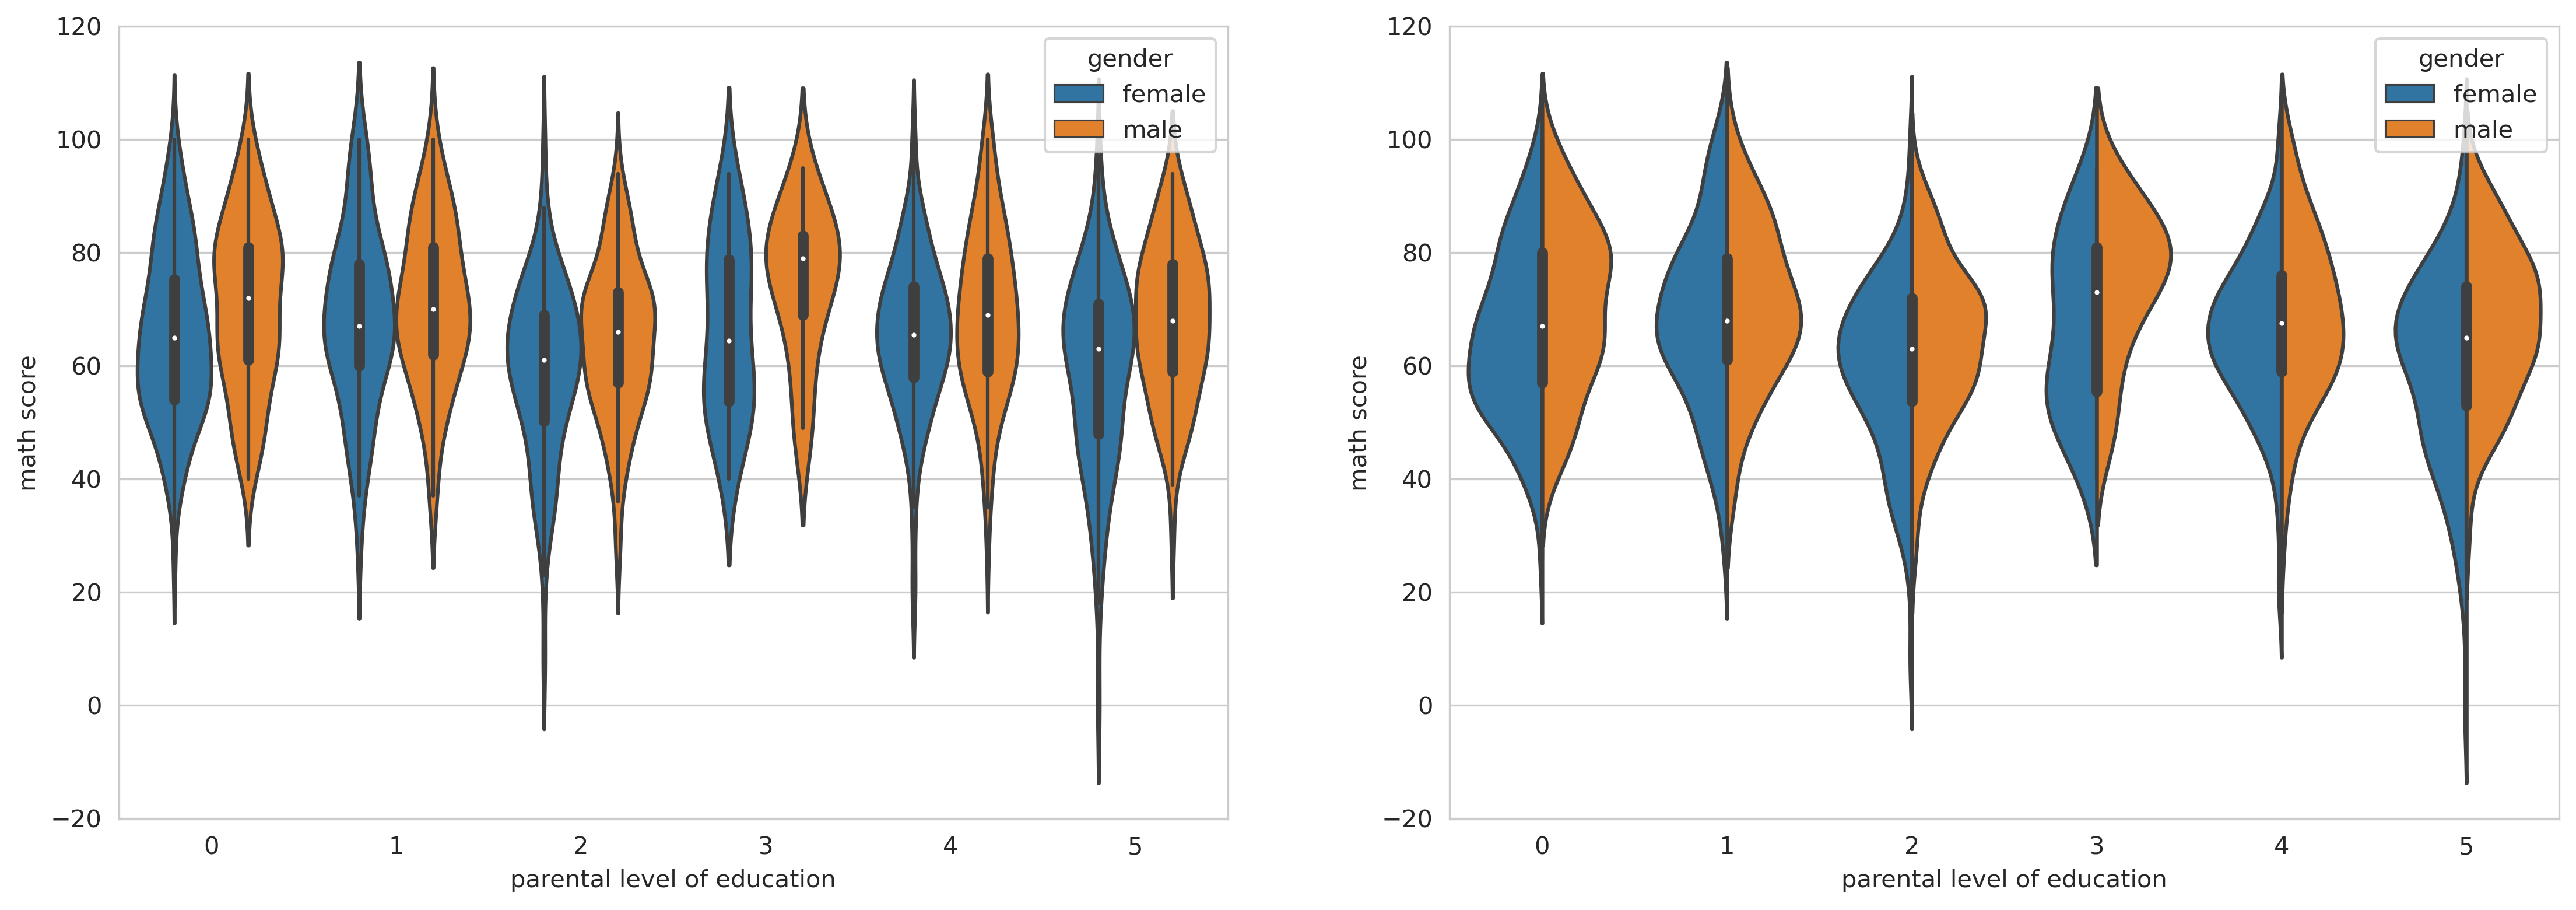

In [ ]:
# type 2 : hue parameter

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.violinplot(x='parental level of education', y='math score', hue='gender', data=data, ax=ax[0])


# type 3 : hue + split
sns.violinplot(x='parental level of education', y='math score', hue='gender', data=data, split=True, ax=ax[1])
plt.show()

### Plotly : px.violin, go.Violin

- [Violin Plots](https://plot.ly/python/violin/)

It's almost like seaborn.

Let's see.

In [ ]:
# type 1 : default violinplot

fig = px.violin(data, x='parental level of education', y='math score')
fig.show()

color add mode. (as hue)

> Are you not used to it now?

In [ ]:
# type 2 : color add violin
fig = px.violin(data, x='parental level of education', y='math score',
                color='gender'
            )
fig.show()

Surprisingly, the following variations are also possible.

In [ ]:
# type 3 : color + violinmode
fig = px.violin(data, x='parental level of education', y='math score',
                color='gender',
                violinmode='overlay'
            )
fig.show()

`go.Violin` can use like this.

In [ ]:
# type 4 : go.box usage
fig = go.Figure()

fig.add_trace(
    go.Violin(x=data['parental level of education'], y=data['math score'],
              box_visible=True, # with box plot
              line_color='black',
              meanline_visible=True, # with mean value
              fillcolor='lightseagreen',
              opacity=0.6)
)

fig.show()


## Joint Plot

### Seaborn : jointplot

- [Joint Plot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) : Draw a plot of two variables with bivariate and univariate graphs.

It is distribution picture that Bayes theorem comes to mind.

You can look at the probability of a bivariate based on the value of each variable.

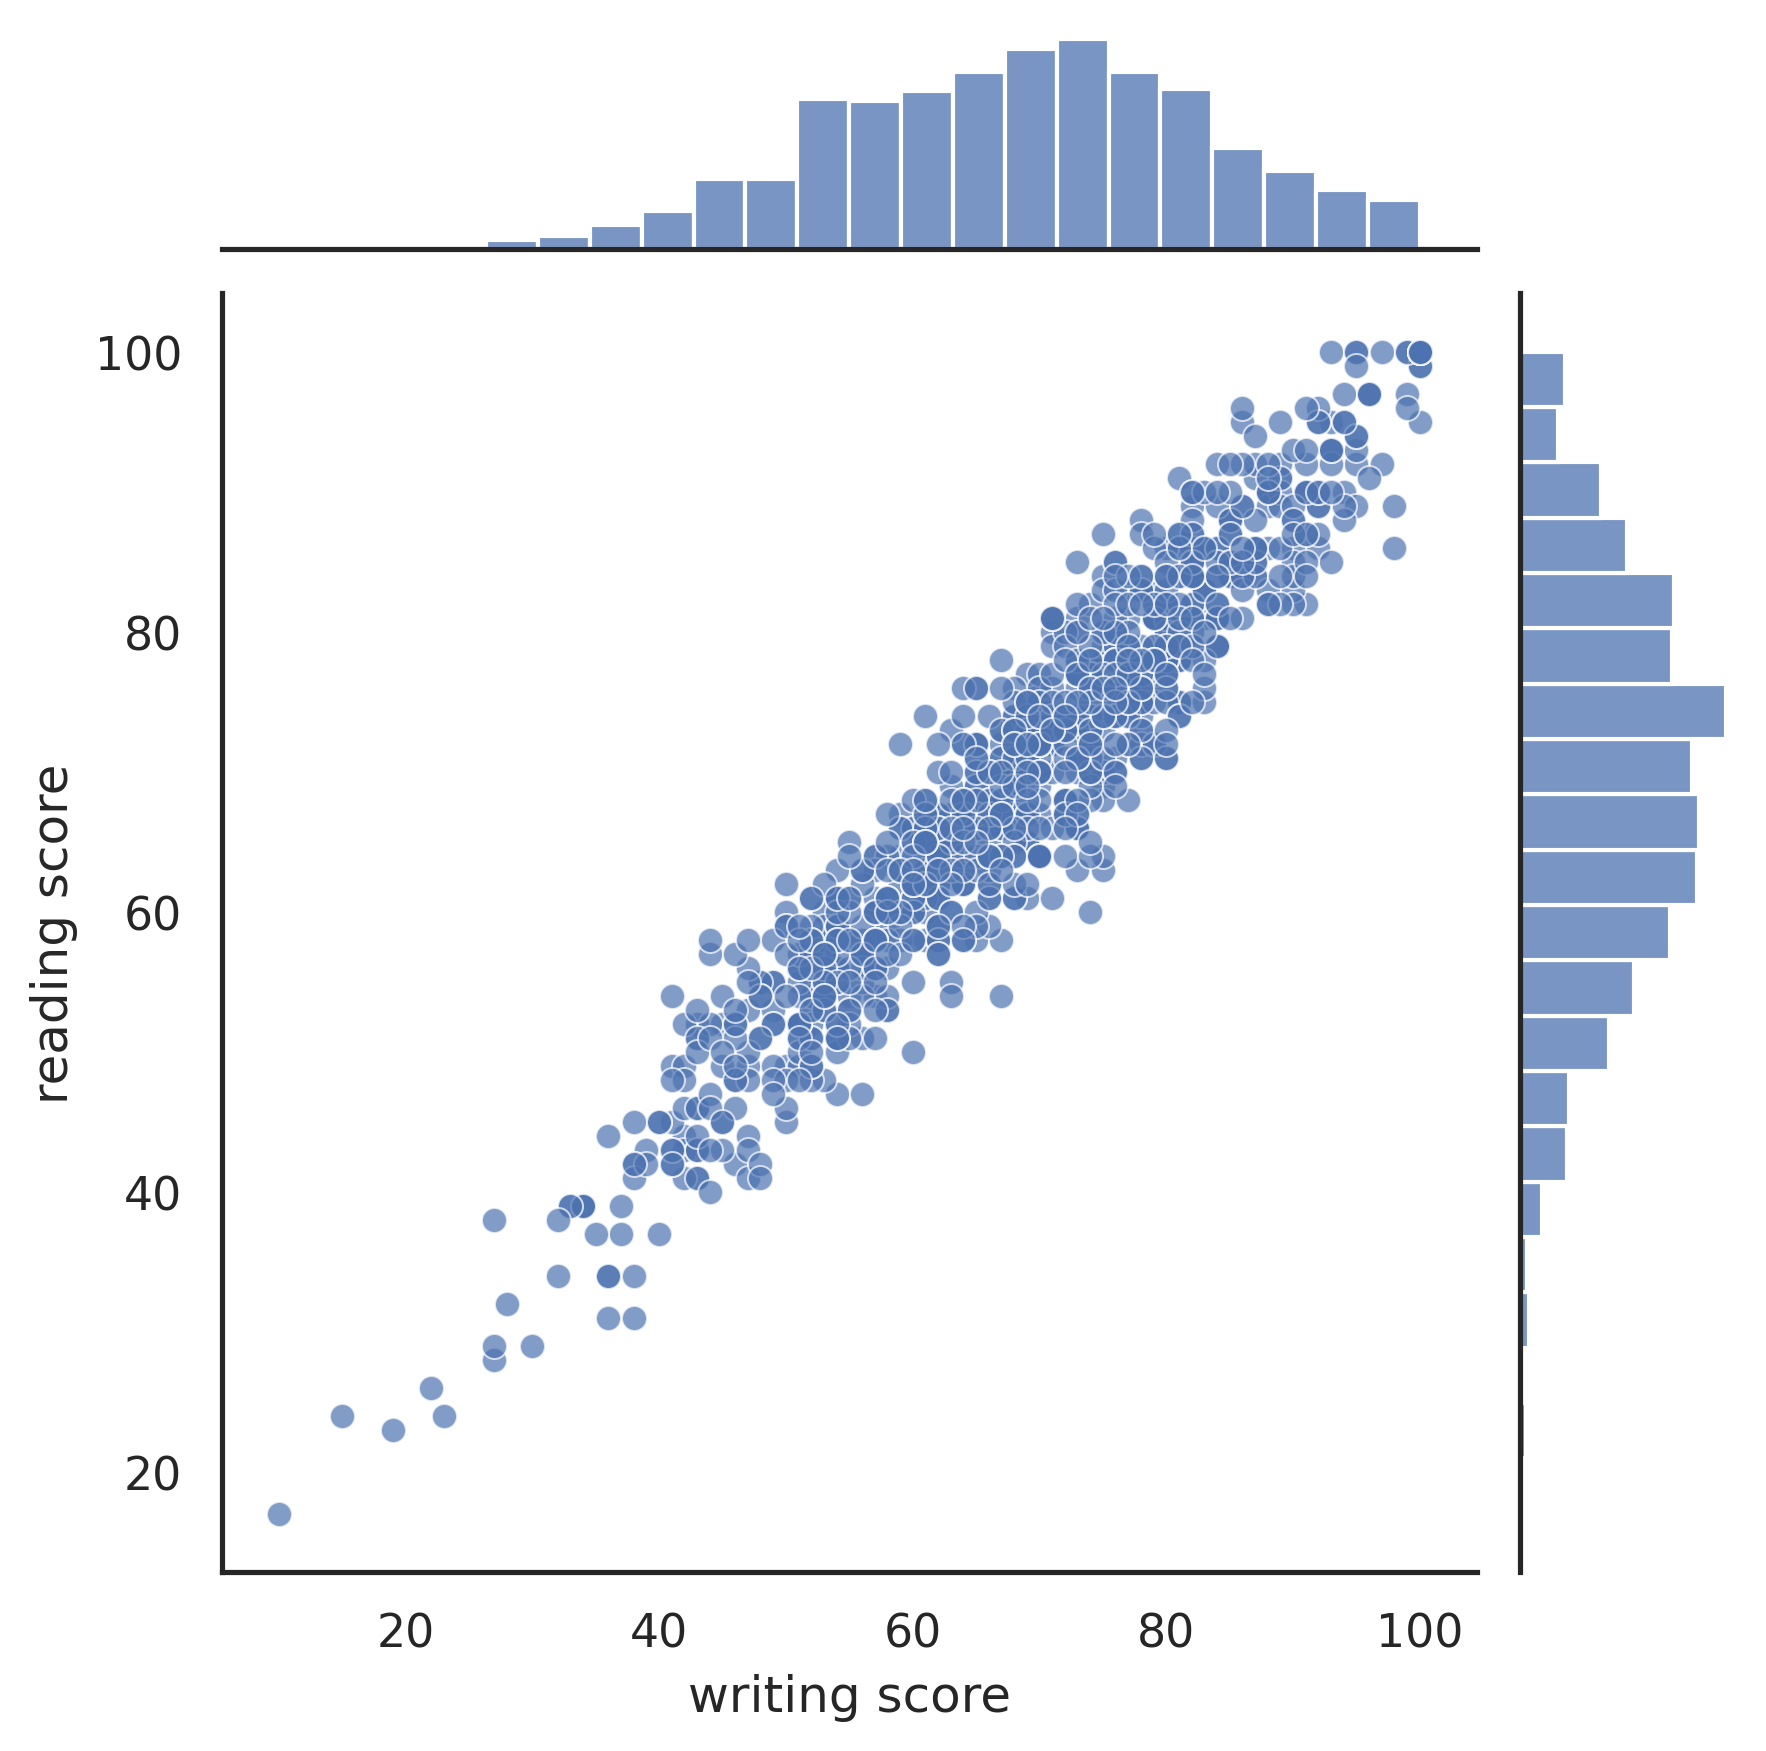

In [ ]:
# type 1 : default
sns.set(style="white", color_codes=True) # suitable theme for jointplot
sns.jointplot(data=data, x='writing score', y='reading score', alpha=0.7)
plt.show()

There are several types. There are three types: reg of regression, hex of hexagon, and kde of kde.

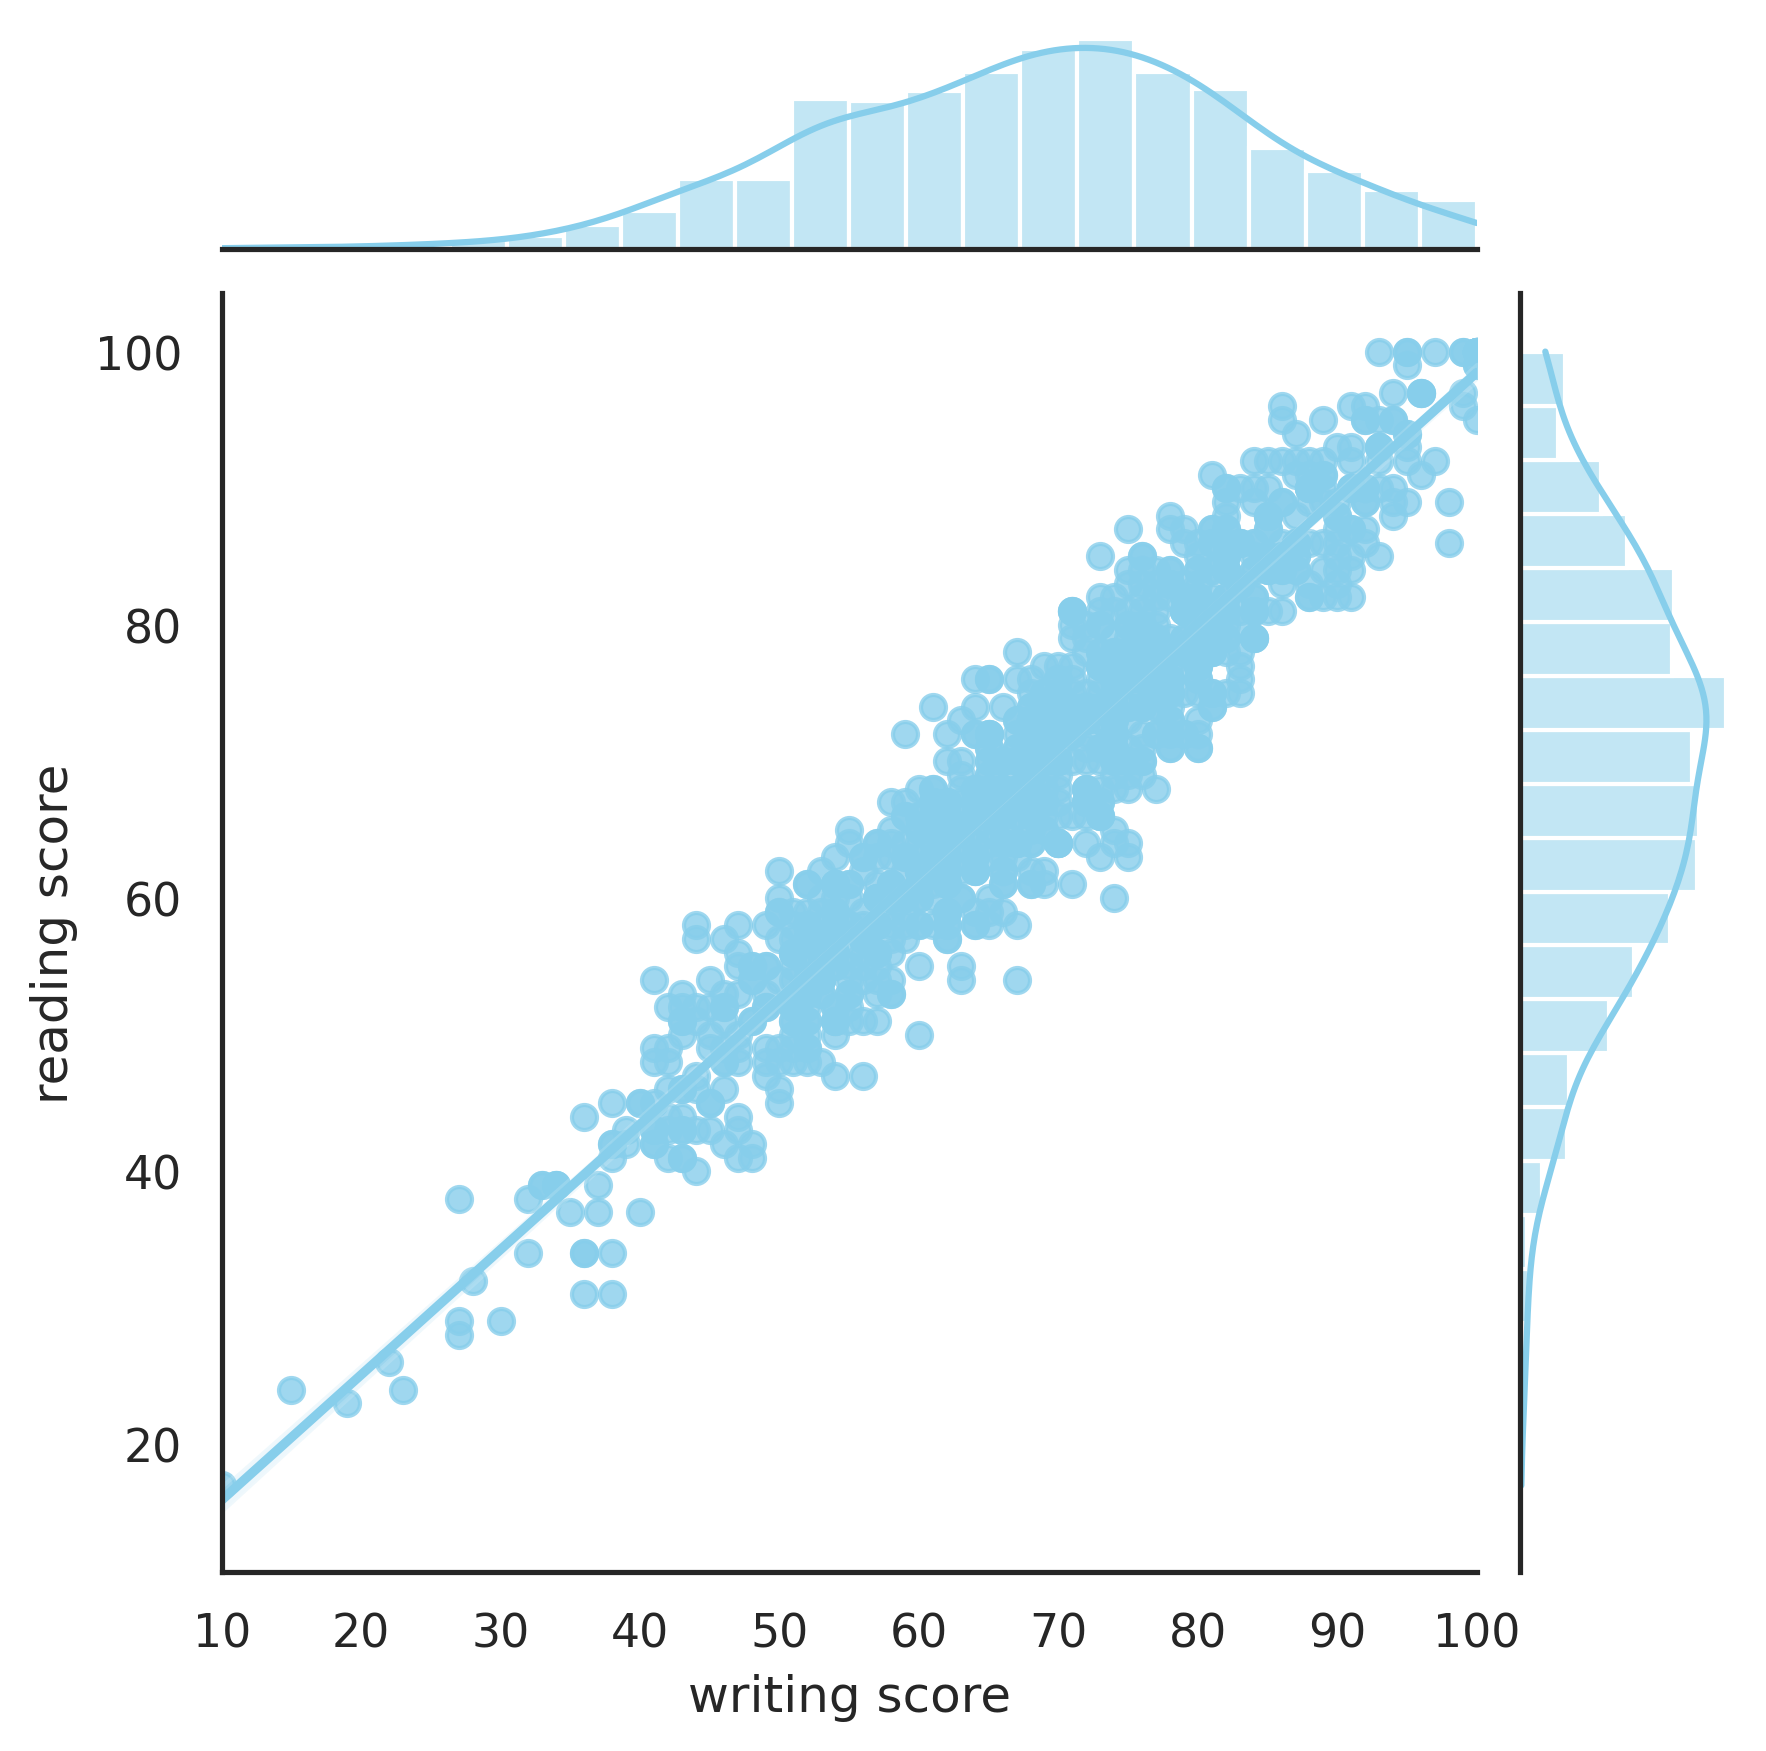

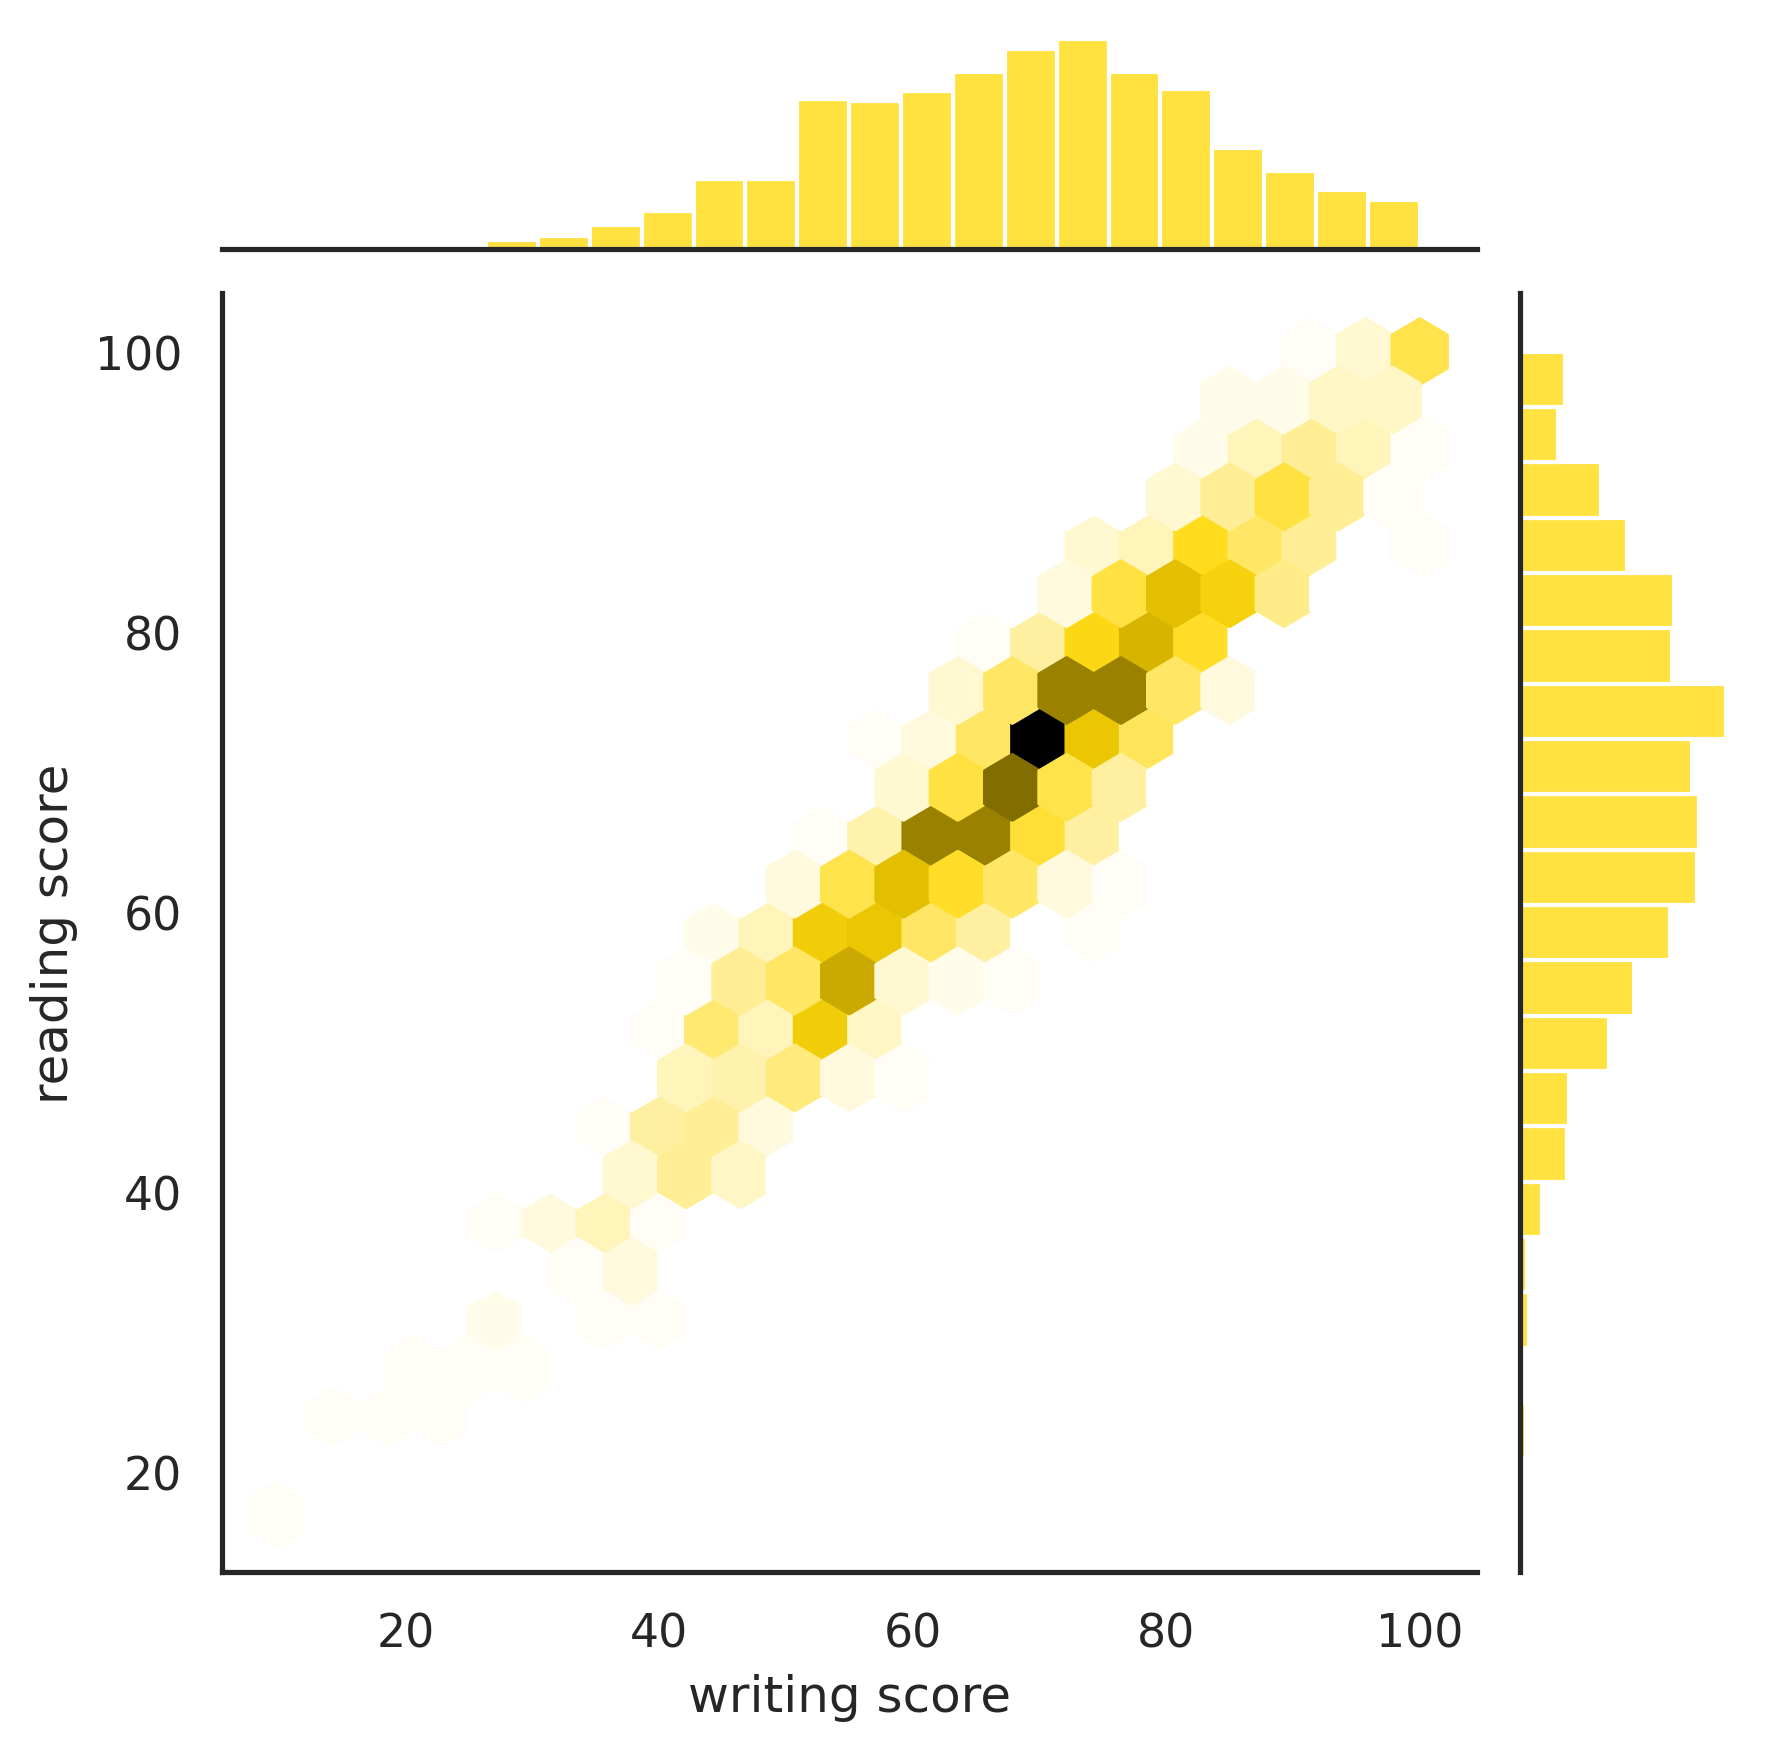

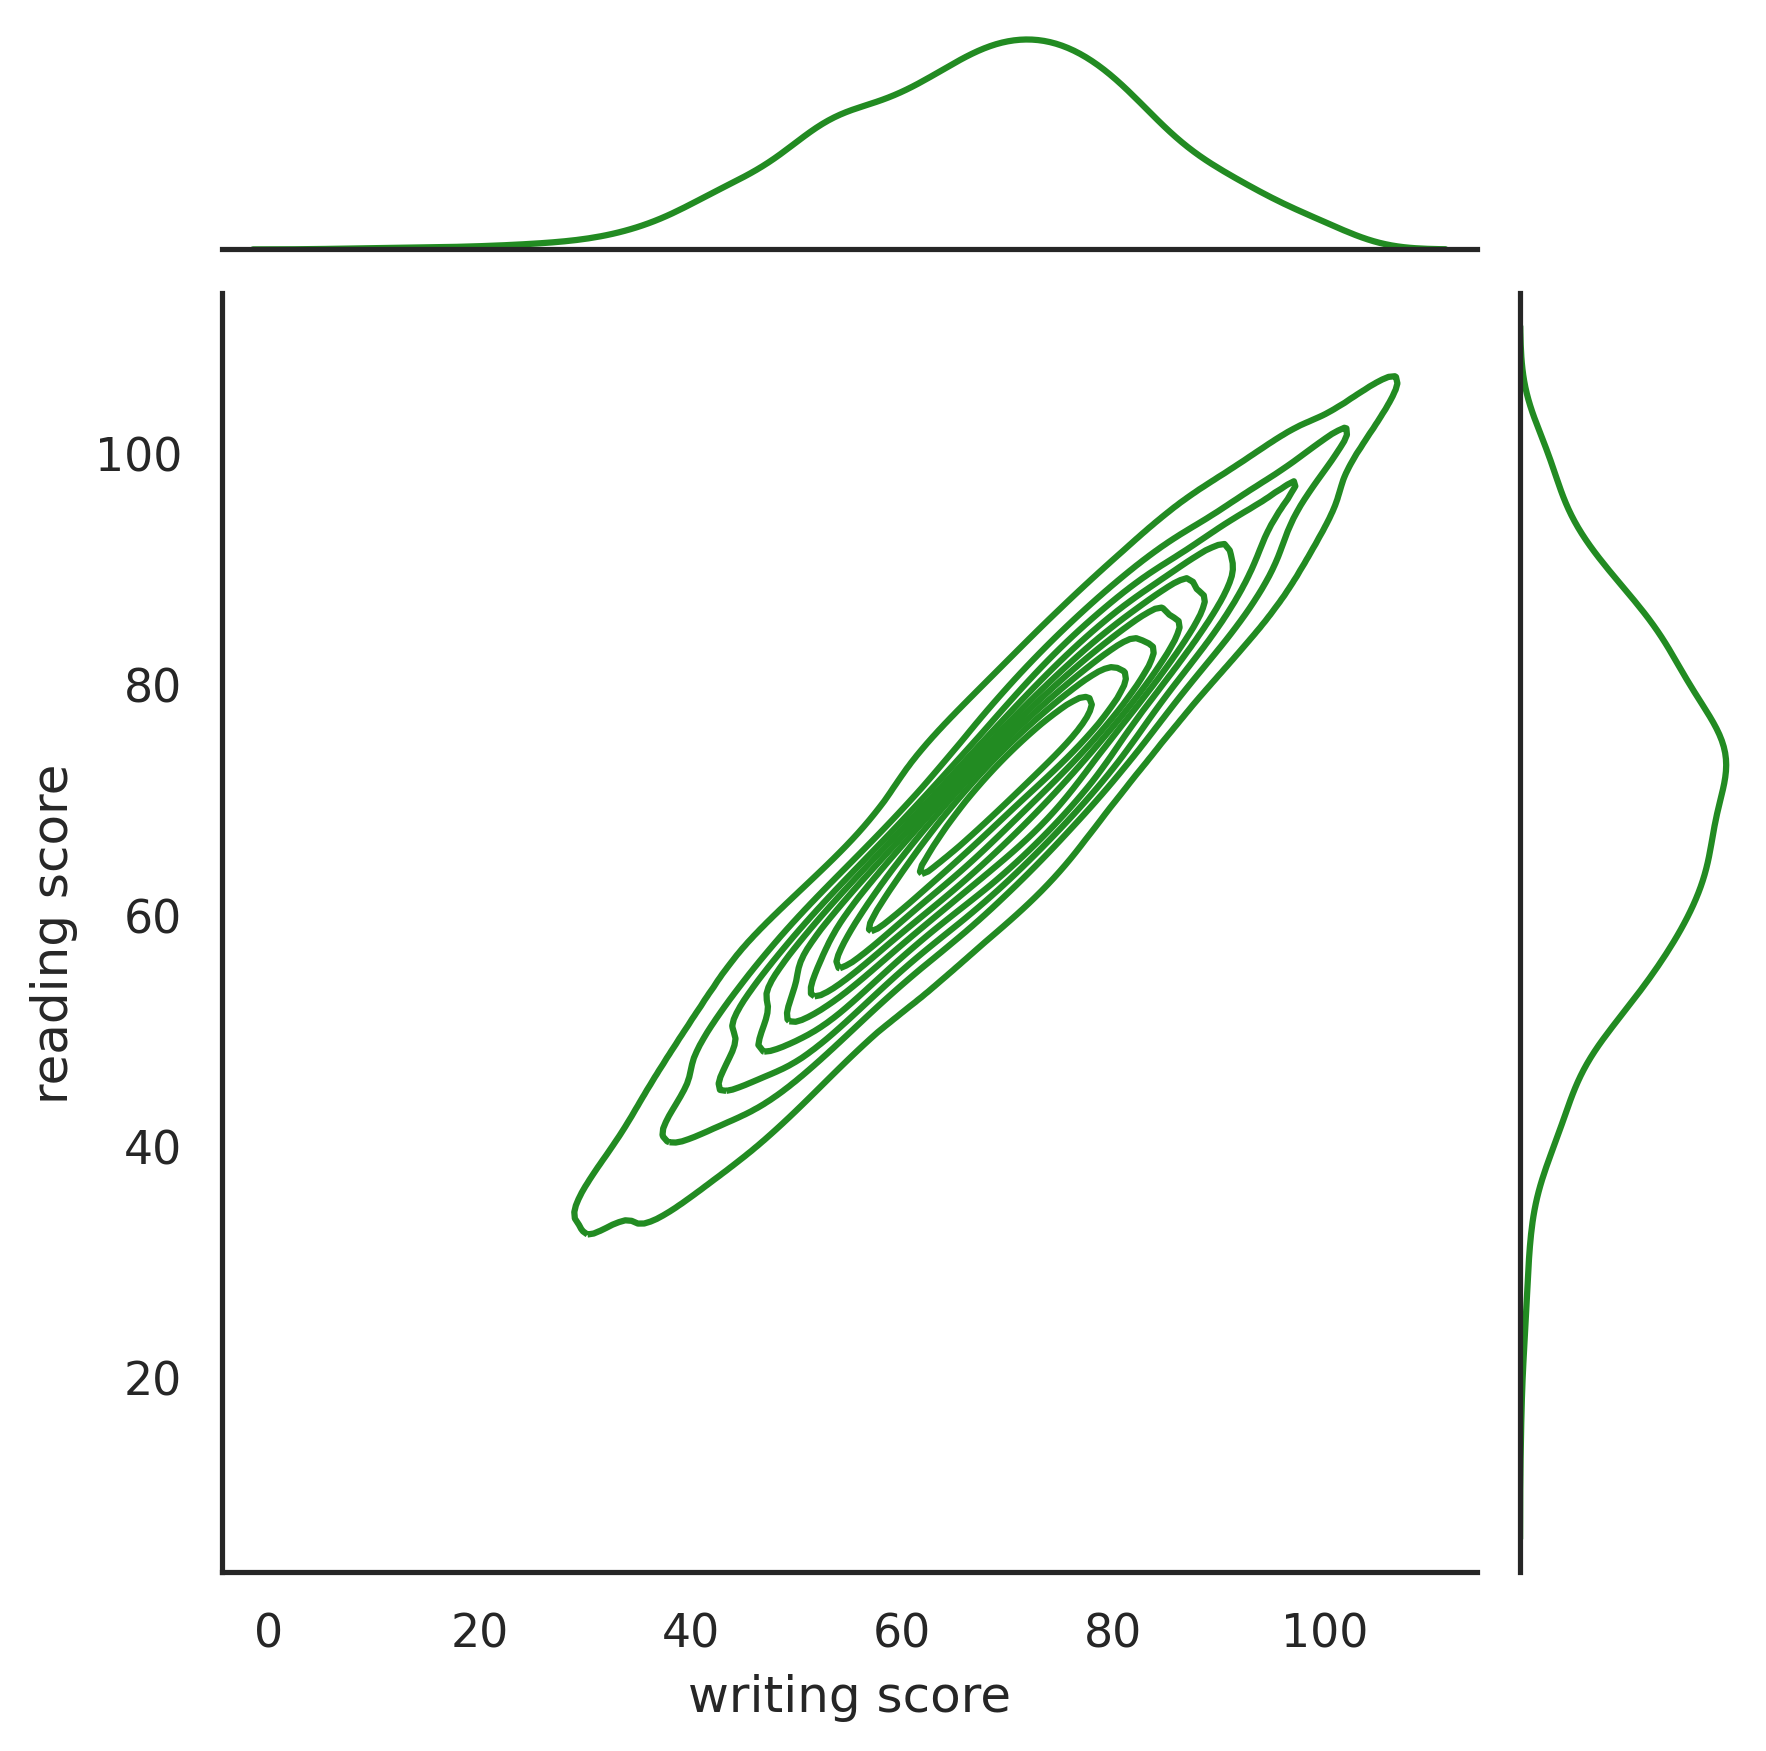

In [ ]:
# type 2 : many types (reg, hex, kde)
sns.jointplot(data=data, x='writing score', y='reading score', kind='reg', color='skyblue')
sns.jointplot(data=data, x='writing score', y='reading score', kind='hex', color='gold')
sns.jointplot(data=data, x='writing score', y='reading score', kind='kde', color='forestgreen' )
plt.show()

### Plotly : go.Histogram2d, go.Histogram2dContour, go.Scatter

- [2D Histogram Contour](https://plot.ly/python/2d-histogram-contour/)

There are no joint plot, so we have to make it ad-hoc

Let's mixed up `go.Histogram2d, go.Histogram2dCountour, go.Scatter`.

In [ ]:
# type 1 : 2d histogram + such as heatmap

fig = go.Figure()

fig.add_trace(go.Histogram2d(
    x=data['writing score'], y=data['reading score'],
    nbinsx=30, nbinsy=30,
    colorscale = 'Blues'
))

fig.show()

In [ ]:
# type 2 : 2d histogram countour

fig = go.Figure()

fig.add_trace(go.Histogram2dContour(
    x=data['writing score'], y=data['reading score'],
    nbinsx=30, nbinsy=30,
    colorscale = 'Blues'
))

fig.show()

It's very complicated...
But this allows you to create the jointplot you want.


In [ ]:
# type 3 : Histogram2dContour + Scatter + Histogram

fig = go.Figure()

fig.add_trace(go.Histogram2dContour(
    x=data['writing score'], y=data['reading score'],
    nbinsx=30, nbinsy=30,
    colorscale = 'Blues',
    xaxis = 'x', yaxis= 'y'
))


fig.add_trace(go.Scatter(
        x=data['writing score'], y=data['reading score'],
        xaxis = 'x',
        yaxis = 'y',
        mode = 'markers',
        marker = dict(
            color = 'rgba(0,0,0,0.3)',
            size = 3
        )
    ))

# Side dist
fig.add_trace(go.Histogram(
        y=data['reading score'],
        xaxis = 'x2',
        marker = dict(
            color = 'rgba(0,0,0,1)'
        )
    ))

# Side dist
fig.add_trace(go.Histogram(
        x=data['writing score'],
        yaxis = 'y2',
        marker = dict(
            color = 'rgba(0,0,0,1)'
        )
    ))

fig.update_layout(
    autosize = False,
    xaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    yaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    xaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    yaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    height = 600,
    width = 600,
    bargap = 0,
    hovermode = 'closest',
    showlegend = False
)

fig.show()

I add it because it looks like it was recently added. (Or in the meantime I didn't know.)

`marginal_x` and `marginal_y` can be used to represent the distribution for each axis.

In [ ]:
#type4 : marginal_x & marginal_y
fig = px.scatter(data, x='writing score', y='reading score', marginal_y="rug", marginal_x="histogram")
fig.show()

## ETC

For hierarchical visualization, you can use Treemap & Sunburst Chart.


### Plotly : px.treemap, px.sunburst

In [ ]:
data = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
data['total'] = 1
fig = px.treemap(data, path=['race/ethnicity', 'parental level of education'], values='total')
fig.show()

In [ ]:
fig = px.sunburst(data, path=['race/ethnicity', 'parental level of education'], values='total')
fig.show()

In conclusion, seaborn is very convenient with many features, and plotly is also quite easy with plotly express.

I would like to share some tips on visualization with many people.
Thank you for reading so far.